<a href="https://colab.research.google.com/github/ImadT/Classification-des-pistes-audio/blob/master/projet_IA_phase_1_PREPROCESSING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# specifying the zip file name 
file_name = "/content/drive/My Drive/fma_metadata.zip"
  
# opening the zip file in READ mode 
import zipfile
archive = zipfile.ZipFile(file_name, 'r')
    # printing all the contents of the zip file 
archive.printdir() 
    

File Name                                             Modified             Size
fma_metadata/                                  2020-01-29 22:45:42            0
fma_metadata/.ipynb_checkpoints/               2020-01-29 20:33:48            0
fma_metadata/.ipynb_checkpoints/IA_projet-checkpoint.ipynb 2020-01-29 22:33:34        26893
fma_metadata/.ipynb_checkpoints/liste_genre-checkpoint.ipynb 2020-01-27 04:30:24       690107
fma_metadata/checksums                         2017-04-01 00:00:00          563
fma_metadata/echonest.csv                      2020-01-26 17:31:02     43878969
fma_metadata/features.csv                      2017-04-01 00:00:00    951117185
fma_metadata/genres.csv                        2020-01-23 19:25:28         4086
fma_metadata/IA_projet.ipynb                   2020-01-29 22:45:42        26893
fma_metadata/liste_genre.ipynb                 2020-01-27 18:05:20       344859
fma_metadata/not_found.pickle                  2017-04-01 00:00:00       216942
fma_metadata/r

In [0]:
!unzip "/content/drive/My Drive/fma_metadata.zip"

Archive:  /content/drive/My Drive/fma_metadata.zip
   creating: fma_metadata/
   creating: fma_metadata/.ipynb_checkpoints/
  inflating: fma_metadata/.ipynb_checkpoints/IA_projet-checkpoint.ipynb  
  inflating: fma_metadata/.ipynb_checkpoints/liste_genre-checkpoint.ipynb  
  inflating: fma_metadata/checksums  
  inflating: fma_metadata/echonest.csv  
  inflating: fma_metadata/features.csv  
  inflating: fma_metadata/genres.csv  
  inflating: fma_metadata/IA_projet.ipynb  
  inflating: fma_metadata/liste_genre.ipynb  
  inflating: fma_metadata/not_found.pickle  
  inflating: fma_metadata/raw_albums.csv  
  inflating: fma_metadata/raw_artists.csv  
  inflating: fma_metadata/raw_echonest.csv  
  inflating: fma_metadata/raw_genres.csv  
  inflating: fma_metadata/raw_tracks.csv  
  inflating: fma_metadata/README.txt  
  inflating: fma_metadata/tracks.csv  


In [0]:
import os
import glob
import pandas as pd
import numpy as np
import librosa
import random
import time 
import pickle
import queue
import threading

from scipy import signal
from scipy.spatial.distance import cdist

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.models import Model
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation

import IPython.display as ipd

import matplotlib
import matplotlib.pyplot as plt

np.random.seed(42)

%matplotlib inline

pd.set_option('max_info_columns', 999)

def swish(x):
    return x*K.sigmoid(x)

get_custom_objects().update({'custom_activation': swish})

Using TensorFlow backend.


# Filtrage de Data

In [0]:
cd '/content/fma_metadata'

/content/fma_metadata


In [0]:
ls

checksums     genres.csv         not_found.pickle  raw_echonest.csv  README.txt
echonest.csv  IA_projet.ipynb    raw_albums.csv    raw_genres.csv    tracks.csv
features.csv  liste_genre.ipynb  raw_artists.csv   raw_tracks.csv


In [0]:
# lire le fichier features.csv
features= pd.read_csv("features.csv", sep=',', engine='python', index_col=0, header=[0, 1, 2], skipinitialspace=True)
features

feature    chroma_cens                      ...       zcr                    
statistics    kurtosis                      ...       min      skew       std
number              01        02        03  ...        01        01        01
track_id                                    ...                              
2             7.180653  5.230309  0.249321  ...  0.000000  2.089872  0.061448
3             1.888963  0.760539  0.345297  ...  0.000000  1.716724  0.069330
5             0.527563 -0.077654 -0.279610  ...  0.000000  2.193303  0.044861
10            3.702245 -0.291193  2.196742  ...  0.000000  3.542325  0.040800
20           -0.193837 -0.198527  0.201546  ...  0.000977  3.189831  0.030993
...                ...       ...       ...  ...       ...       ...       ...
155316       -0.490129  0.463834  2.321970  ...  0.003906  0.955388  0.012385
155317       -0.461559 -0.229601 -0.496632  ...  0.002441  1.283060  0.019059
155318        0.552473 -0.110498 -0.532014  ...  0.003418  0.828569  0.017904
155319       -0.176901  0.187208 -0.050664  ...  0.004883  1.818740  0.020133
155320        0.489665  1.862421  0.854461  ...  0.004395  4.687204  0.137205

[106574 rows x 518 columns]

In [0]:
# lire fichier echonest.csv
echonest = pd.read_csv("echonest.csv", sep=';', engine='python',header=[0, 1, 2], skipinitialspace=True, index_col=0)
echonest.head()

echonest                         ...                                         
         audio_features                         ... temporal_features                       
           acousticness danceability    energy  ...               221        222         223
track_id                                        ...                                         
2              0.416675     0.675894  0.634476  ...           3.61288  13.316690  262.929749
3              0.374408     0.528643  0.817461  ...           6.01864  16.673548  325.581085
5              0.043567     0.745566  0.701470  ...           5.86635  16.013849  356.755737
10             0.951670     0.658179  0.924525  ...           8.33319  21.317064  483.403809
134            0.452217     0.513238  0.560410  ...          11.20267  26.454180  751.147705

[5 rows x 249 columns]

Ce fichier ne comprend pas de donnee importantes

In [0]:
for i in echonest.columns:
  print(i,'\n')

('echonest', 'audio_features', 'acousticness') 

('echonest', 'audio_features', 'danceability') 

('echonest', 'audio_features', 'energy') 

('echonest', 'audio_features', 'instrumentalness') 

('echonest', 'audio_features', 'liveness') 

('echonest', 'audio_features', 'speechiness') 

('echonest', 'audio_features', 'tempo') 

('echonest', 'audio_features', 'valence') 

('echonest', 'metadata', 'album_date') 

('echonest', 'metadata', 'album_name') 

('echonest', 'metadata', 'artist_latitude') 

('echonest', 'metadata', 'artist_location') 

('echonest', 'metadata', 'artist_longitude') 

('echonest', 'metadata', 'artist_name') 

('echonest', 'metadata', 'release') 

('echonest', 'ranks', 'artist_discovery_rank') 

('echonest', 'ranks', 'artist_familiarity_rank') 

('echonest', 'ranks', 'artist_hotttnesss_rank') 

('echonest', 'ranks', 'song_currency_rank') 

('echonest', 'ranks', 'song_hotttnesss_rank') 

('echonest', 'social_features', 'artist_discovery') 

('echonest', 'social_feature

# **Extractiong gender id**


In [0]:
raw_tracks = pd.read_csv('raw_tracks.csv', sep=',', engine='python')
raw_tracks

,track_id,album_id,album_title,album_url,artist_id,artist_name,artist_url,artist_website,license_image_file,license_image_file_large,license_parent_id,license_title,license_url,tags,track_bit_rate,track_comments,track_composer,track_copyright_c,track_copyright_p,track_date_created,track_date_recorded,track_disc_number,track_duration,track_explicit,track_explicit_notes,track_favorites,track_file,track_genres,track_image_file,track_information,track_instrumental,track_interest,track_language_code,track_listens,track_lyricist,track_number,track_publisher,track_title,track_url
0,2,1.0,AWOL - A Way Of Life,http://freemusicarchive.org/music/AWOL/AWOL_-_...,1,AWOL,http://freemusicarchive.org/music/AWOL/,http://www.AzillionRecords.blogspot.com,http://i.creativecommons.org/l/by-nc-sa/3.0/us...,http://fma-files.s3.amazonaws.com/resources/im...,5.0,Attribution-NonCommercial-ShareAlike 3.0 Inter...,http://creativecommons.org/licenses/by-nc-sa/3.0/,[],256000.0,0,NaN,NaN,NaN,11/26/2008 01:48:12 AM,11/26/2008,1,02:48,Radio-Unsafe,NaN,2,music/WFMU/AWOL/AWOL_-_A_Way_Of_Life/AWOL_-_03...,"[{'genre_id': '21', 'genre_title': 'Hip-Hop', ...",https://freemusicarchive.org/file/images/album...,NaN,0,4656,en,1293,NaN,3,NaN,Food,http://freemusicarchive.org/music/AWOL/AWOL_-_...
1,3,1.0,AWOL - A Way Of Life,http://freemusicarchive.org/music/AWOL/AWOL_-_...,1,AWOL,http://freemusicarchive.org/music/AWOL/,http://www.AzillionRecords.blogspot.com,http://i.creativecommons.org/l/by-nc-sa/3.0/us...,http://fma-files.s3.amazonaws.com/resources/im...,5.0,Attribution-NonCommercial-ShareAlike 3.0 Inter...,http://creativecommons.org/licenses/by-nc-sa/3.0/,[],256000.0,0,NaN,NaN,NaN,11/26/2008 01:48:14 AM,11/26/2008,1,03:57,Radio-Unsafe,NaN,1,music/WFMU/AWOL/AWOL_-_A_Way_Of_Life/AWOL_-_04...,"[{'genre_id': '21', 'genre_title': 'Hip-Hop', ...",https://freemusicarchive.org/file/images/album...,NaN,0,1470,en,514,NaN,4,NaN,Electric Ave,http://freemusicarchive.org/music/AWOL/AWOL_-_...
2,5,1.0,AWOL - A Way Of Life,http://freemusicarchive.org/music/AWOL/AWOL_-_...,1,AWOL,http://freemusicarchive.org/music/AWOL/,http://www.AzillionRecords.blogspot.com,http://i.creativecommons.org/l/by-nc-sa/3.0/us...,http://fma-files.s3.amazonaws.com/resources/im...,5.0,Attribution-NonCommercial-ShareAlike 3.0 Inter...,http://creativecommons.org/licenses/by-nc-sa/3.0/,[],256000.0,0,NaN,NaN,NaN,11/26/2008 01:48:20 AM,11/26/2008,1,03:26,Radio-Unsafe,NaN,6,music/WFMU/AWOL/AWOL_-_A_Way_Of_Life/AWOL_-_06...,"[{'genre_id': '21', 'genre_title': 'Hip-Hop', ...",https://freemusicarchive.org/file/images/album...,NaN,0,1933,en,1151,NaN,6,NaN,This World,http://freemusicarchive.org/music/AWOL/AWOL_-_...
3,10,6.0,Constant Hitmaker,http://freemusicarchive.org/music/Kurt_Vile/Co...,6,Kurt Vile,http://freemusicarchive.org/music/Kurt_Vile/,http://kurtvile.com,http://i.creativecommons.org/l/by-nc-nd/3.0/88...,http://fma-files.s3.amazonaws.com/resources/im...,NaN,Attribution-NonCommercial-NoDerivatives (aka M...,http://creativecommons.org/licenses/by-nc-nd/3.0/,[],192000.0,0,Kurt Vile,NaN,NaN,11/25/2008 05:49:06 PM,11/26/2008,1,02:41,Radio-Safe,NaN,178,music/WFMU/Kurt_Vile/Constant_Hitmaker/Kurt_Vi...,"[{'genre_id': '10', 'genre_title': 'Pop', 'gen...",https://freemusicarchive.org/file/images/album...,NaN,0,54881,en,50135,NaN,1,NaN,Freeway,http://freemusicarchive.org/music/Kurt_Vile/Co...
4,20,4.0,Niris,http://freemusicarchive.org/music/Chris_and_Ni...,4,Nicky Cook,http://freemusicarchive.org/music/Chris_and_Ni...,NaN,http://i.creativecommons.org/l/by-nc-nd/3.0/88...,http://fma-files.s3.amazonaws.com/resources/im...,NaN,Attribution-NonCommercial-NoDerivatives (aka M...,http://creativecommons.org/licenses/by-nc-nd/3.0/,[],256000.0,0,NaN,NaN,NaN,11/26/2008 01:48:56 AM,1/01/2008,1,05:11,NaN,NaN,0,music/WFMU/Nicky_Cook__Chris_Andrews/Niris/Nic...,"[{'genre_id': '76', 'genre_title': 'Experiment...",https://freemusicarchive.org/file/images/album...,NaN,0,978,en,361,NaN,3,NaN,Spiritual Level,http://freemusicarchive.org/

In [0]:
print(raw_tracks['track_genres'].isna().sum(),'\n')
print(len(raw_tracks['track_genres']))

2609 

109727


**Commentaire** le fichier raw_track.csv n'est pas bon pour l'extraction de l'id_track <-> genre.
>> Alors :
en recours au fichier: **track.csv**


# tracks

In [0]:
tracks = pd.read_csv('tracks.csv', sep=',', engine='python', index_col=0, header=[0, 1], skipinitialspace=True)
tracks

album  ...                                      track
         comments  ...                                      title
track_id           ...                                           
2               0  ...                                       Food
3               0  ...                               Electric Ave
5               0  ...                                 This World
10              0  ...                                    Freeway
20              0  ...                            Spiritual Level
...           ...  ...                                        ...
155316          0  ...                                  The Auger
155317          0  ...                            Let's Skin Ruby
155318          0  ...         My House Smells Like Kim Deal/Pulp
155319          0  ...                    The Man With Two Mouths
155320          0  ...  Another Trick Up My Sleeve (Instrumental)

[106574 rows x 52 columns]

In [0]:
for i in tracks.columns:
  print(i,'\n')

('album', 'comments') 

('album', 'date_created') 

('album', 'date_released') 

('album', 'engineer') 

('album', 'favorites') 

('album', 'id') 

('album', 'information') 

('album', 'listens') 

('album', 'producer') 

('album', 'tags') 

('album', 'title') 

('album', 'tracks') 

('album', 'type') 

('artist', 'active_year_begin') 

('artist', 'active_year_end') 

('artist', 'associated_labels') 

('artist', 'bio') 

('artist', 'comments') 

('artist', 'date_created') 

('artist', 'favorites') 

('artist', 'id') 

('artist', 'latitude') 

('artist', 'location') 

('artist', 'longitude') 

('artist', 'members') 

('artist', 'name') 

('artist', 'related_projects') 

('artist', 'tags') 

('artist', 'website') 

('artist', 'wikipedia_page') 

('set', 'split') 

('set', 'subset') 

('track', 'bit_rate') 

('track', 'comments') 

('track', 'composer') 

('track', 'date_created') 

('track', 'date_recorded') 

('track', 'duration') 

('track', 'favorites') 

('track', 'genre_top') 

('tr

**creer une nouvelle dataframe pour le training et le testion**
Contained all of features and genre
to use pour appliquer l'ACP and 

lister les colonnes de genre_id

In [0]:
genres = pd.read_csv('genres.csv', sep=';'  , engine='python', index_col=0)

genres.top_level.unique()

array([  38,    2,    3,    4,    5,   20,    8,    9,   10,   14,   12,
         13,   15,   17, 1235,   21])

In [0]:
features.columns

MultiIndex([('chroma_cens', 'kurtosis', '01'),
            ('chroma_cens', 'kurtosis', '02'),
            ('chroma_cens', 'kurtosis', '03'),
            ('chroma_cens', 'kurtosis', '04'),
            ('chroma_cens', 'kurtosis', '05'),
            ('chroma_cens', 'kurtosis', '06'),
            ('chroma_cens', 'kurtosis', '07'),
            ('chroma_cens', 'kurtosis', '08'),
            ('chroma_cens', 'kurtosis', '09'),
            ('chroma_cens', 'kurtosis', '10'),
            ...
            (    'tonnetz',      'std', '04'),
            (    'tonnetz',      'std', '05'),
            (    'tonnetz',      'std', '06'),
            (        'zcr', 'kurtosis', '01'),
            (        'zcr',      'max', '01'),
            (        'zcr',     'mean', '01'),
            (        'zcr',   'median', '01'),
            (        'zcr',      'min', '01'),
            (        'zcr',     'skew', '01'),
            (        'zcr',      'std', '01')],
           names=['feature', 'statistics', 

In [0]:
group = sorted(list(set([col[:2] for col in features])))
#group = list(set([col for col in features]))
#group

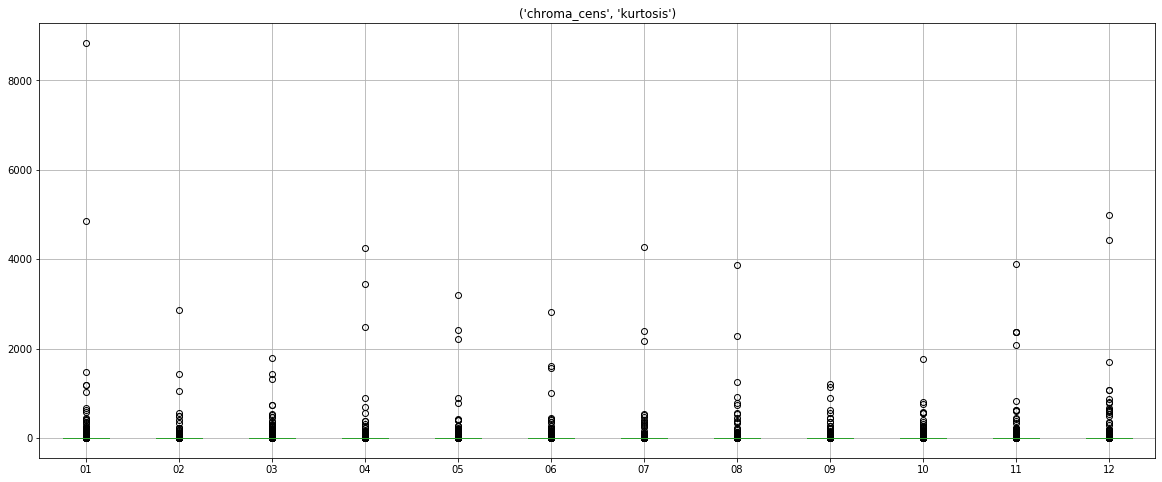

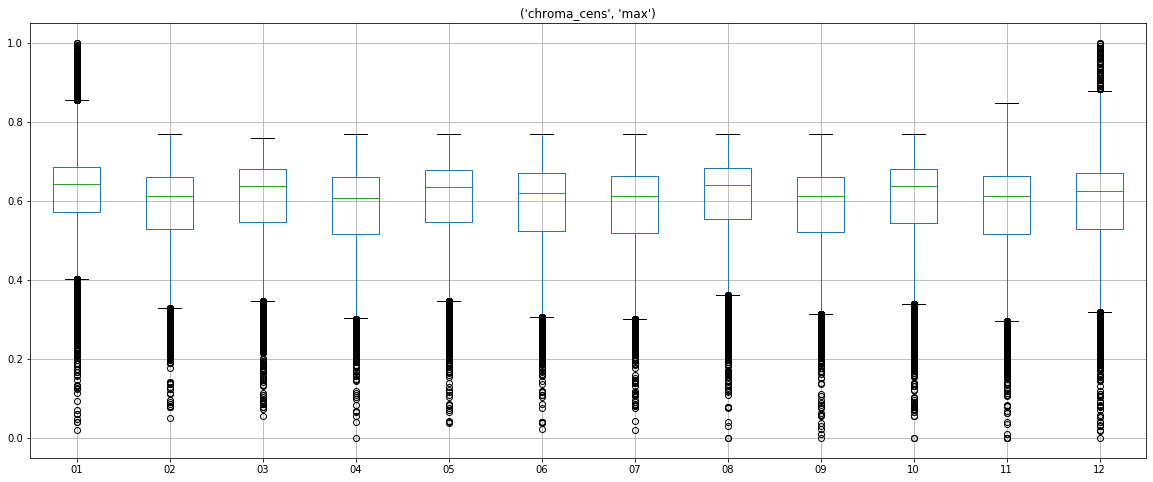

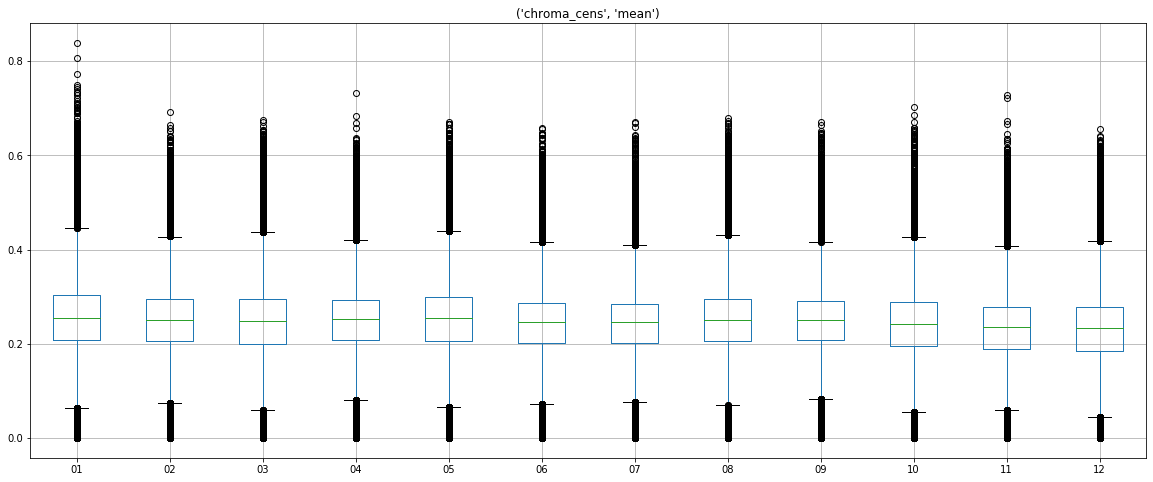

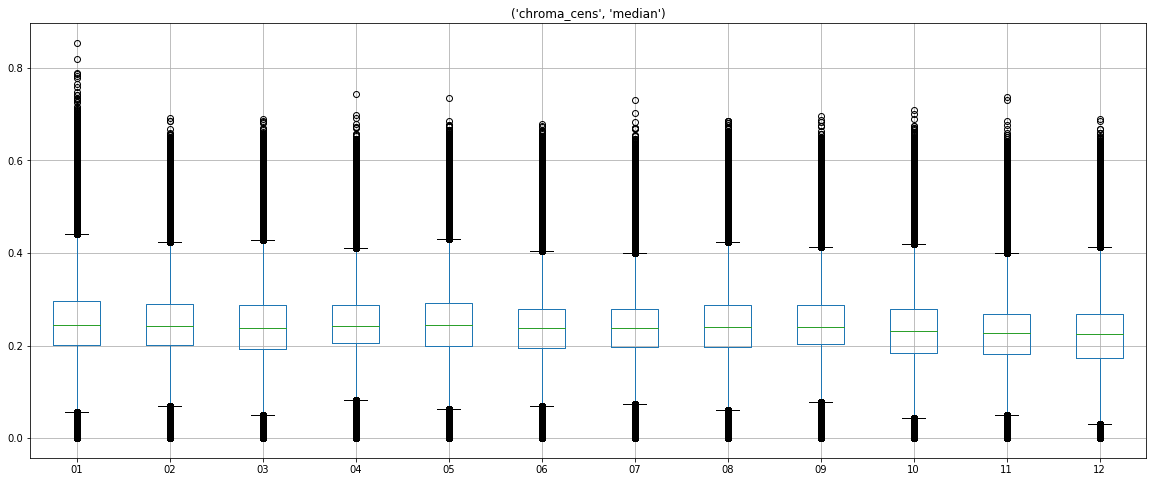

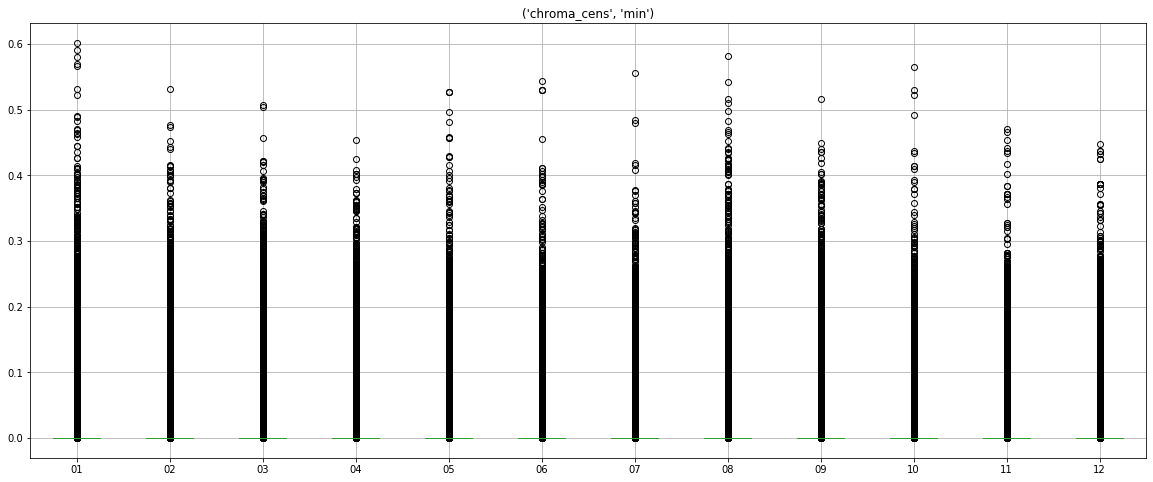

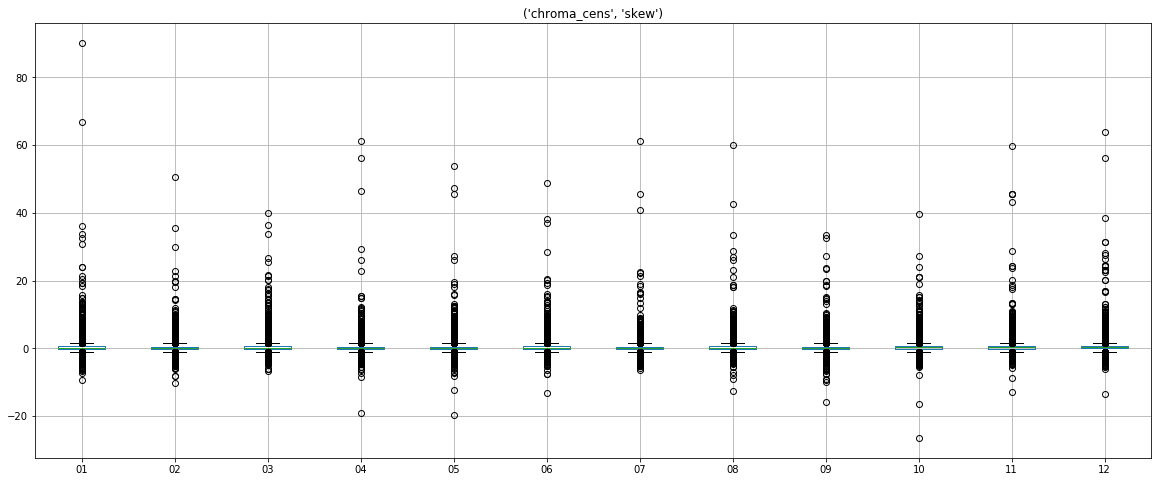

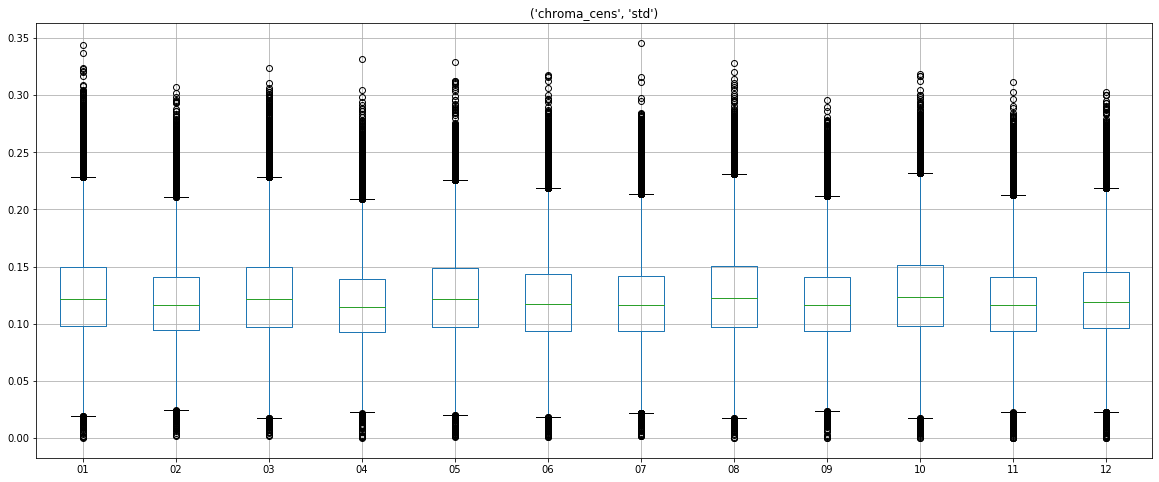

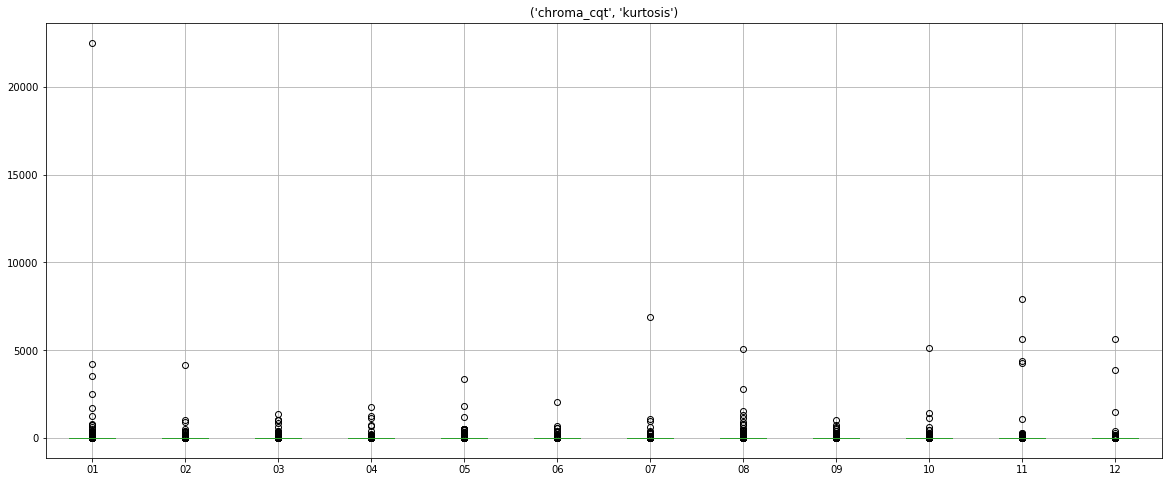

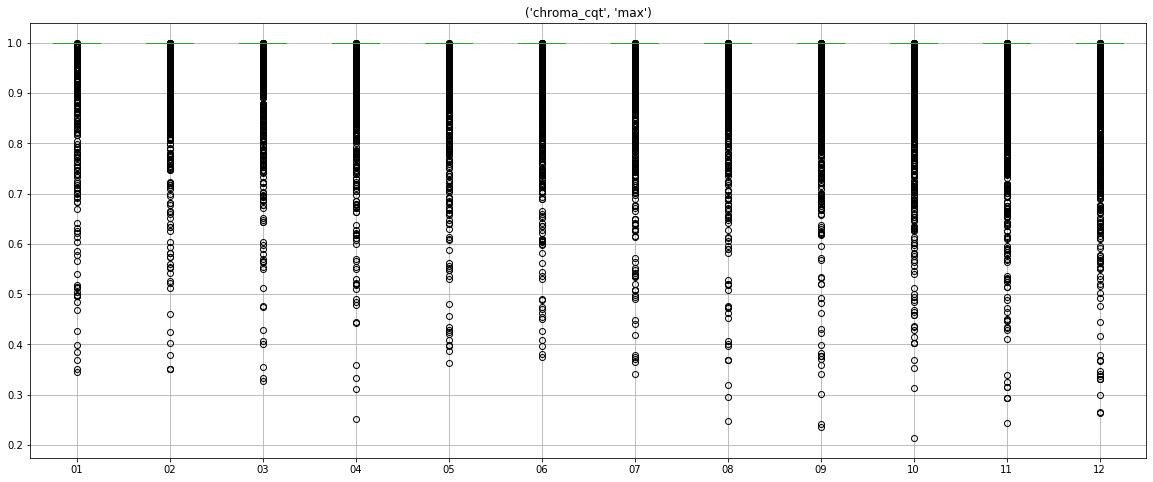

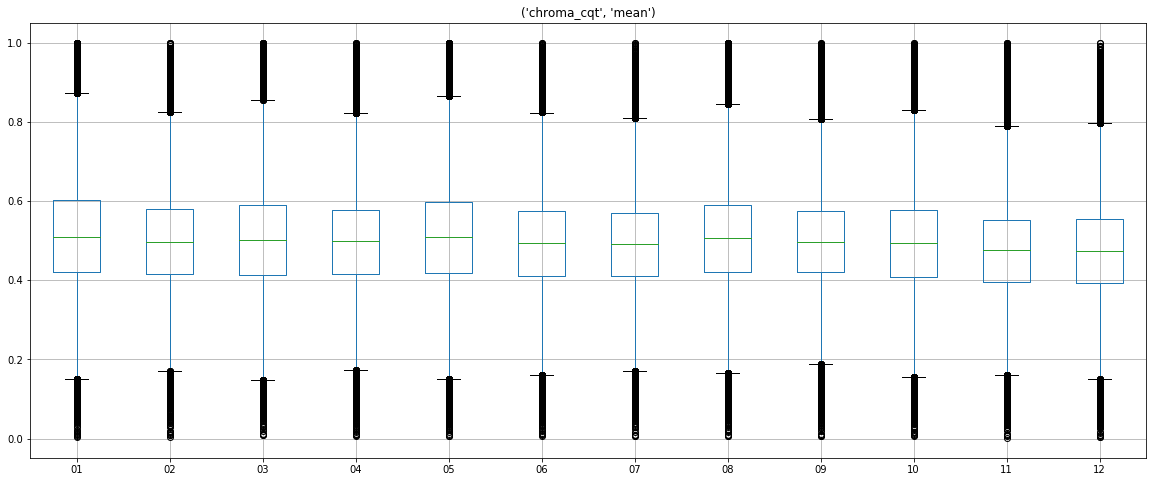

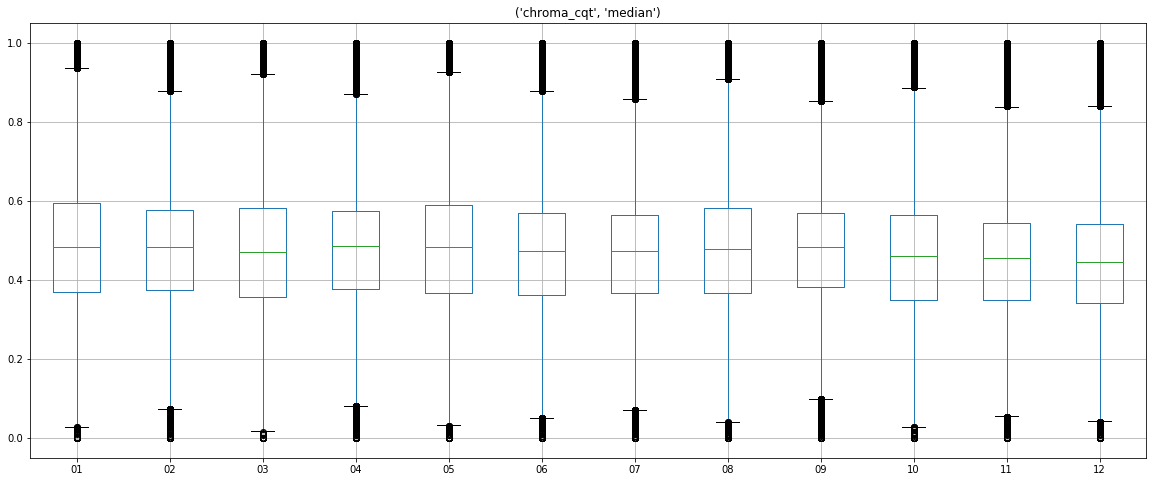

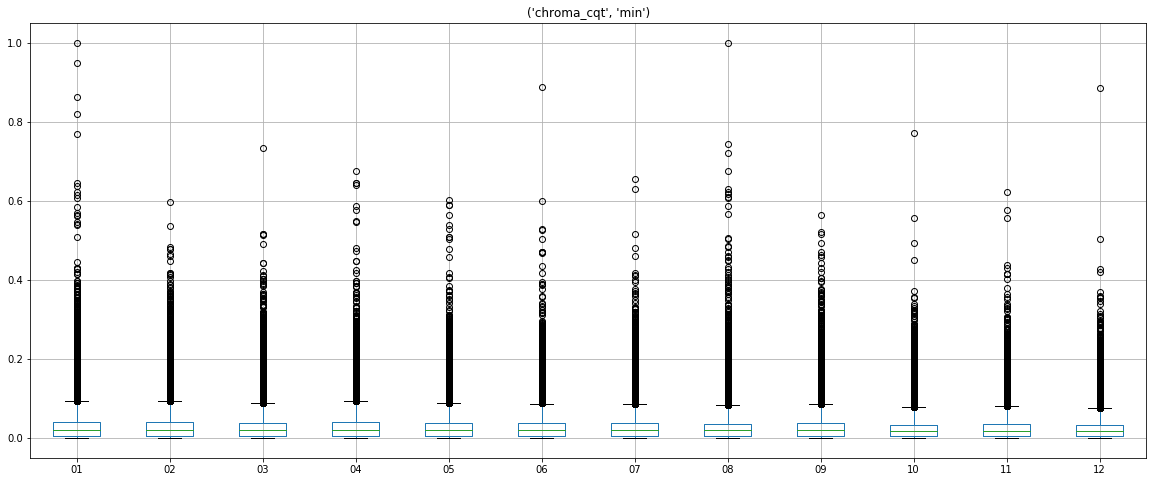

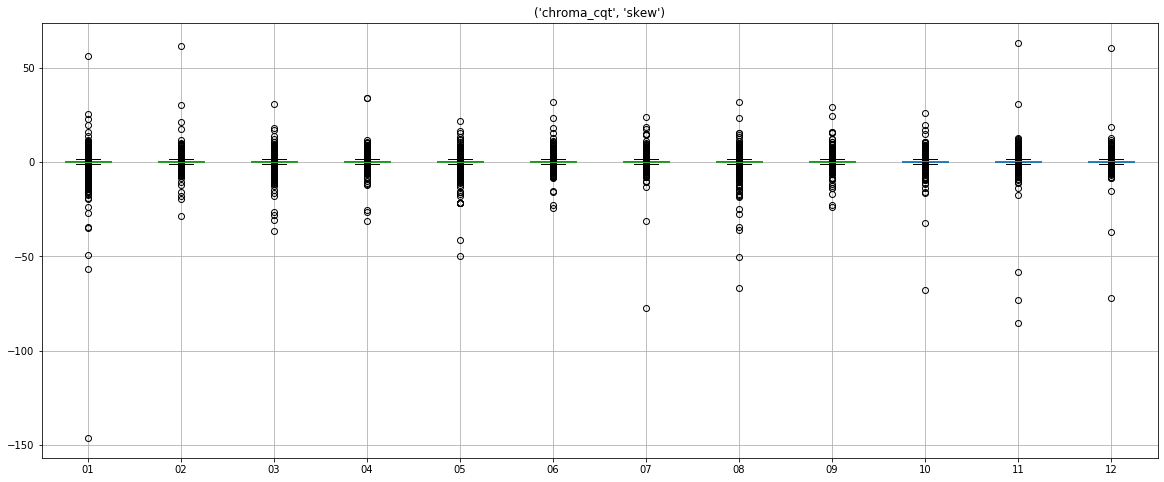

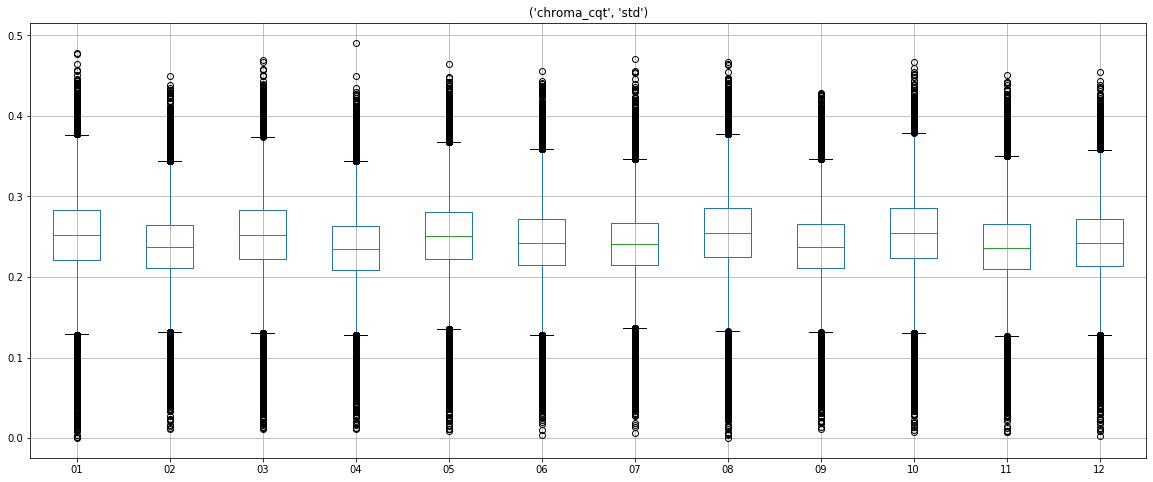

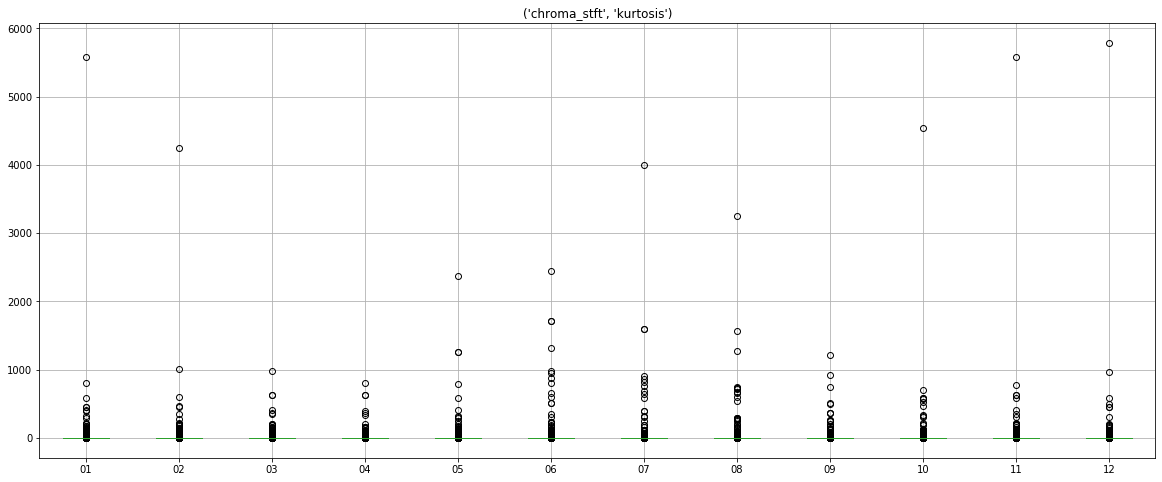

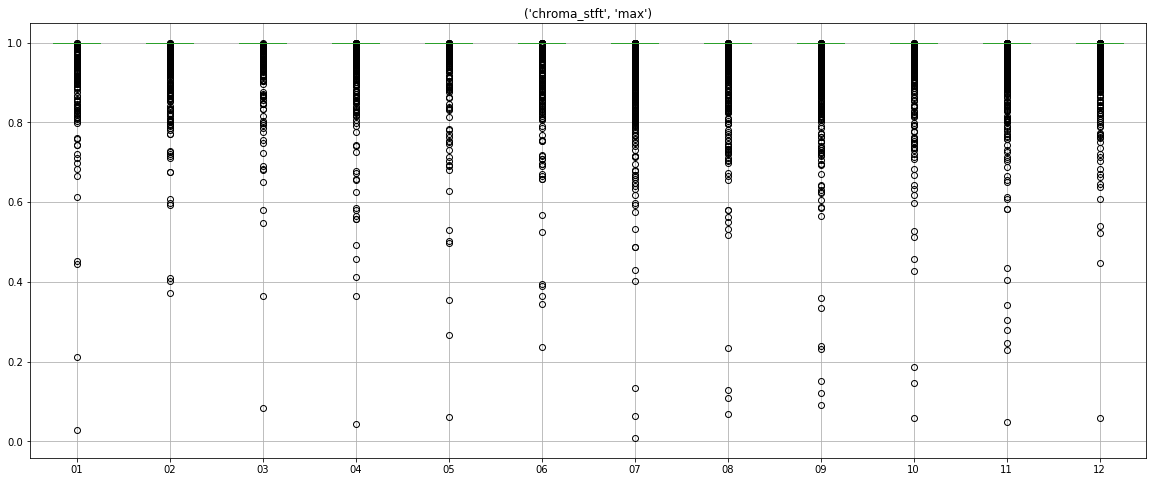

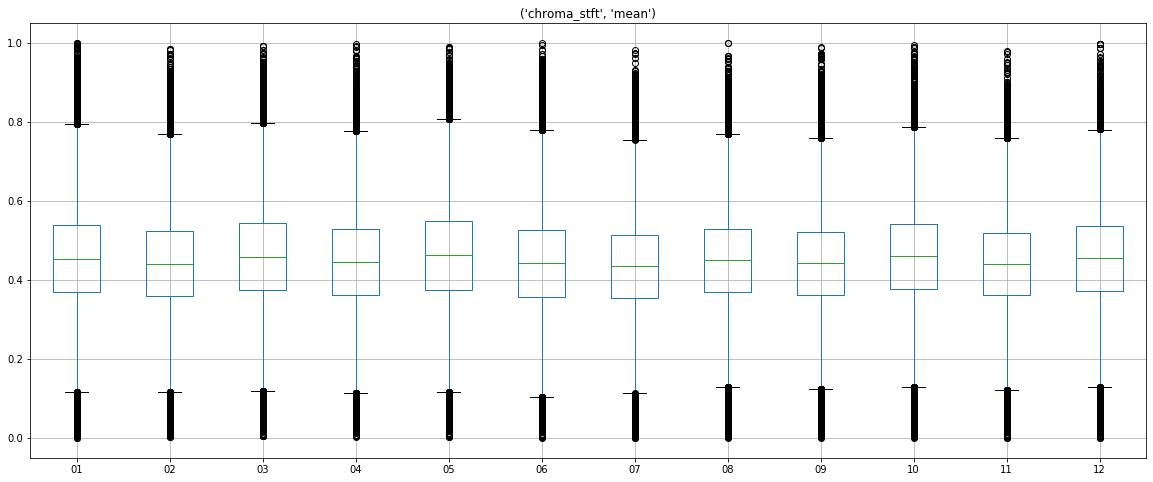

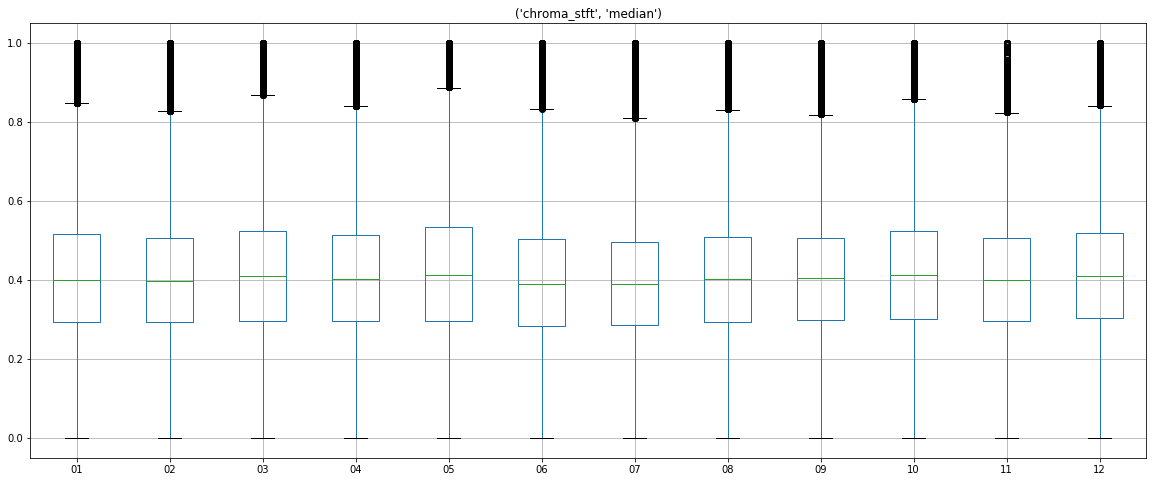

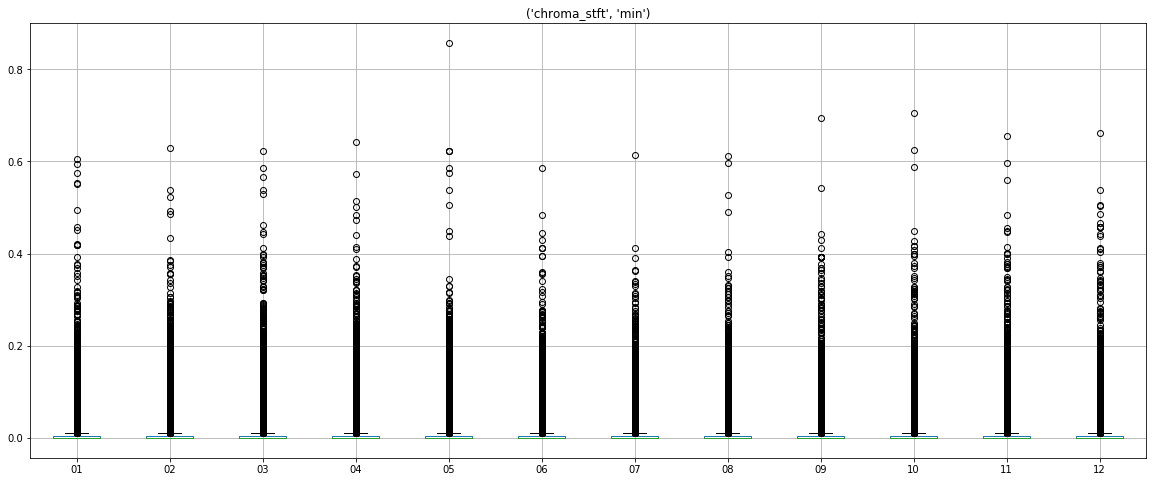

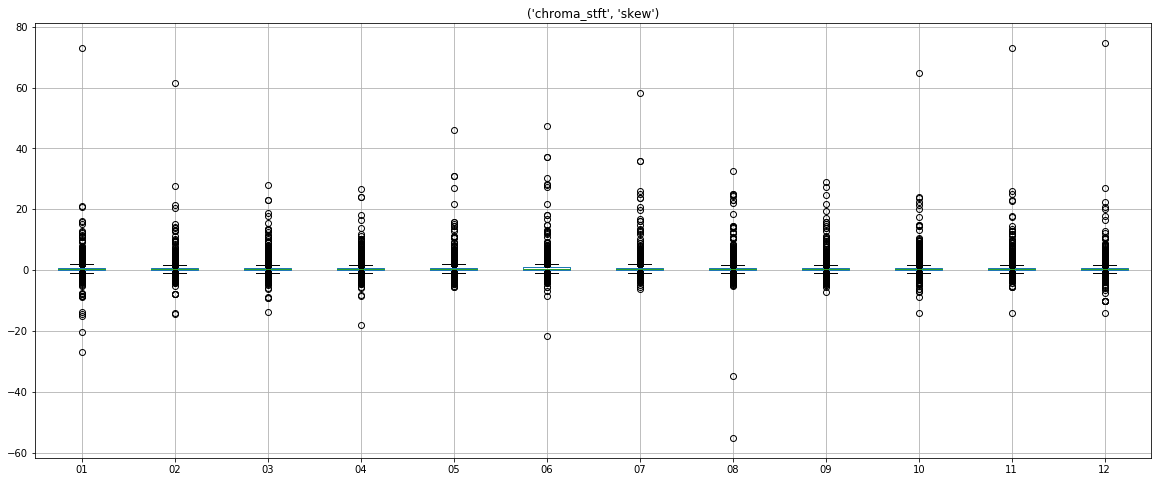

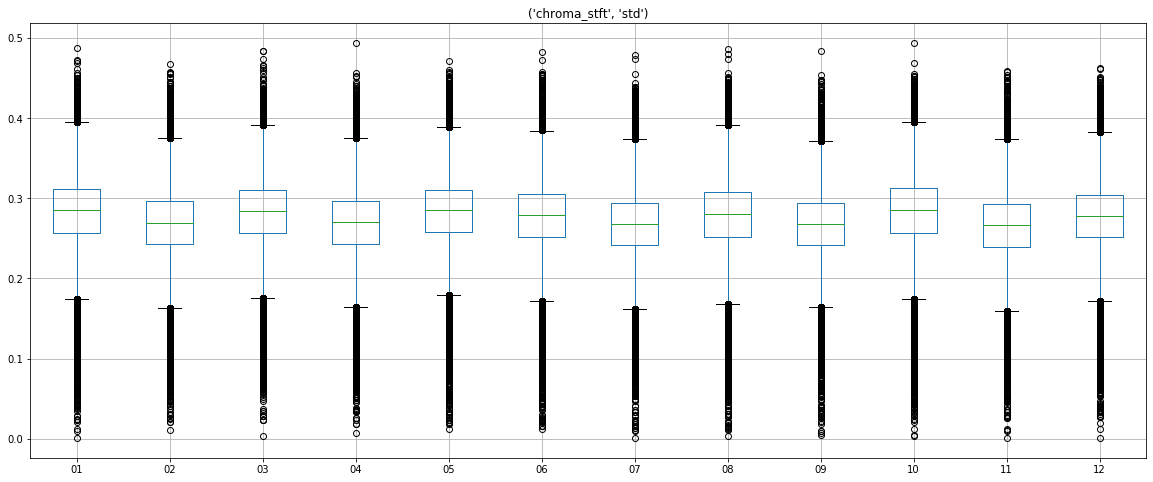

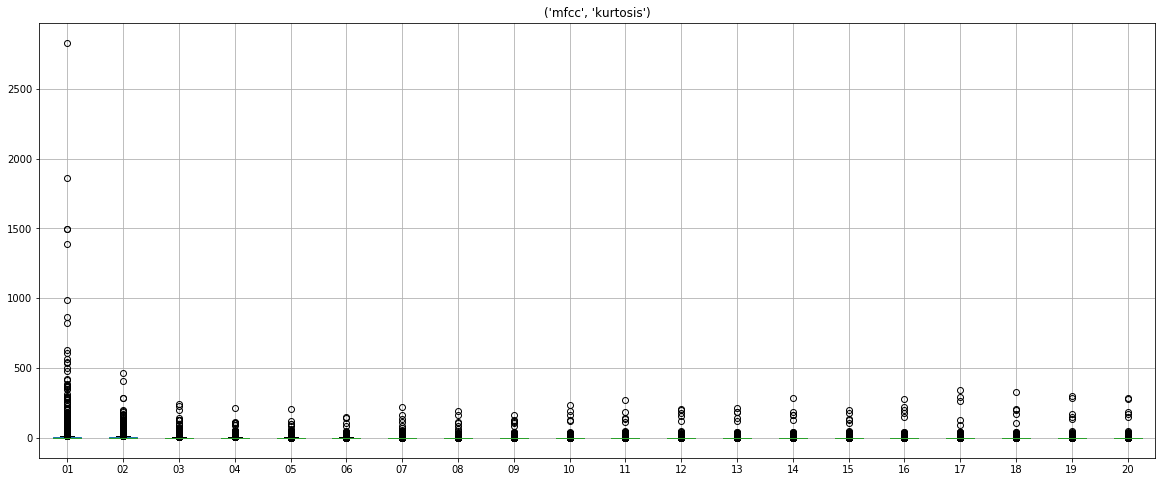

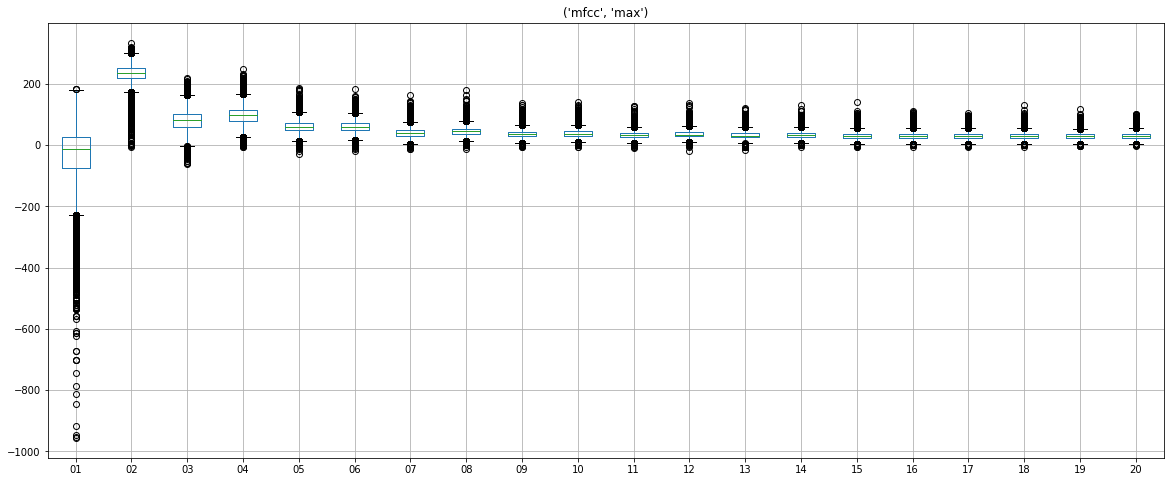

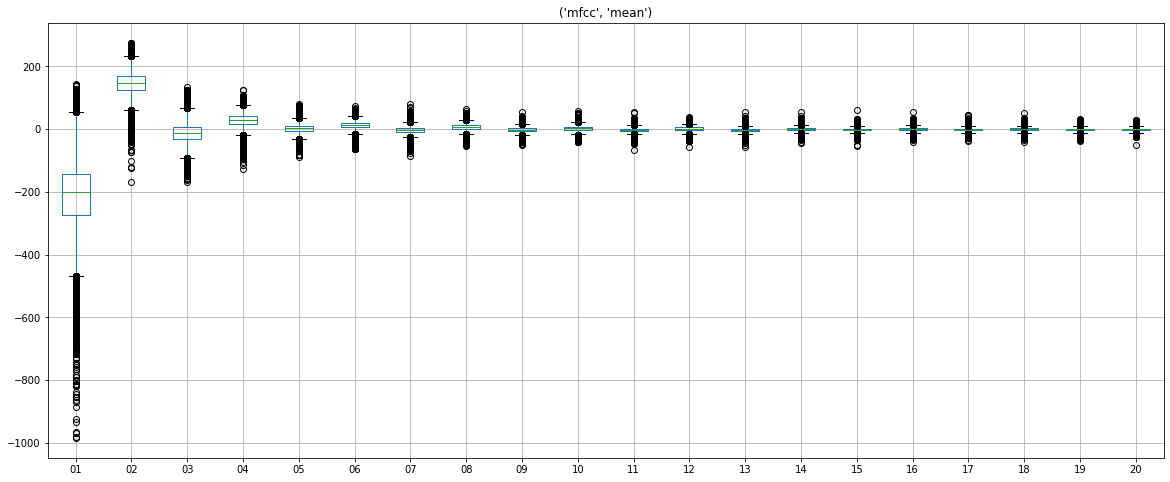

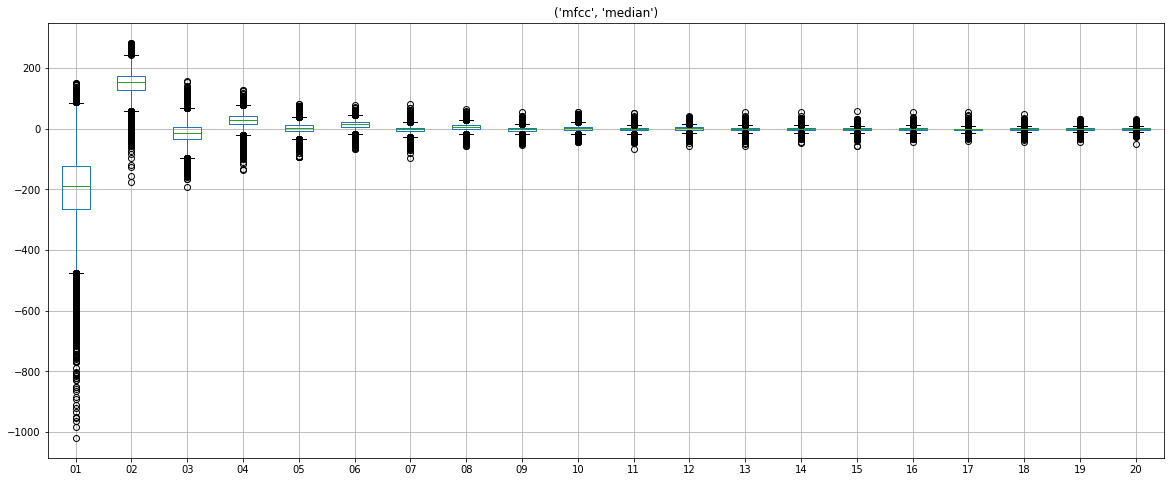

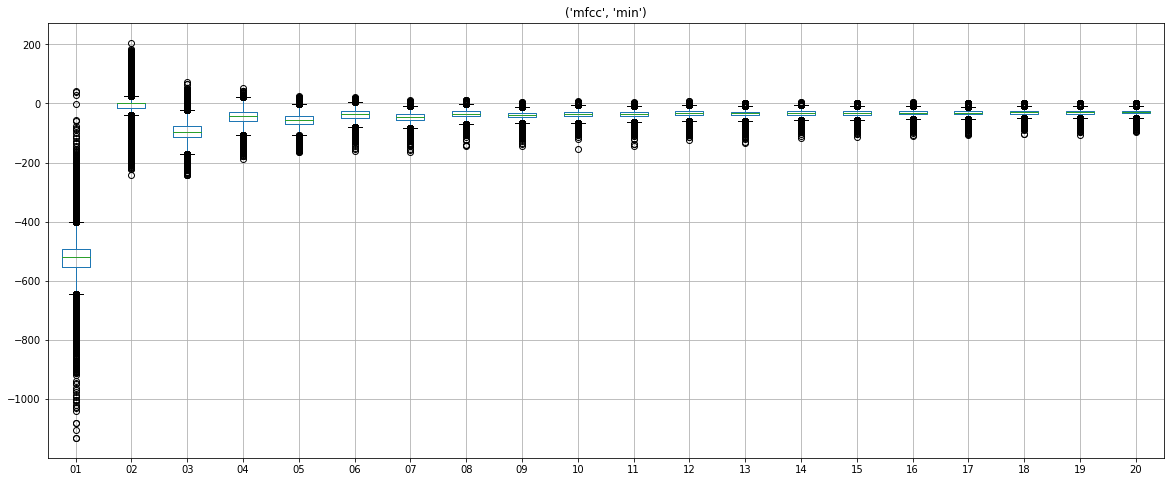

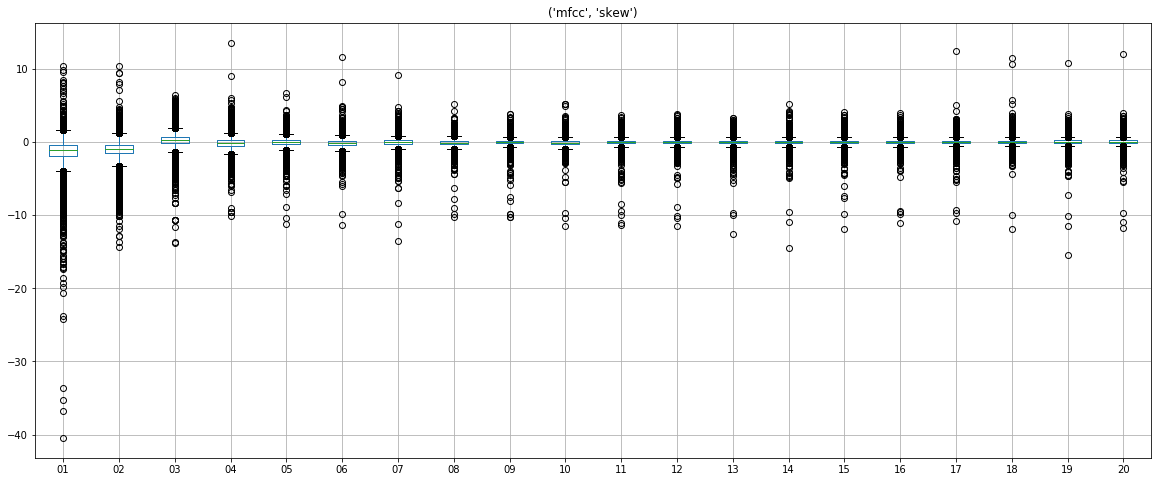

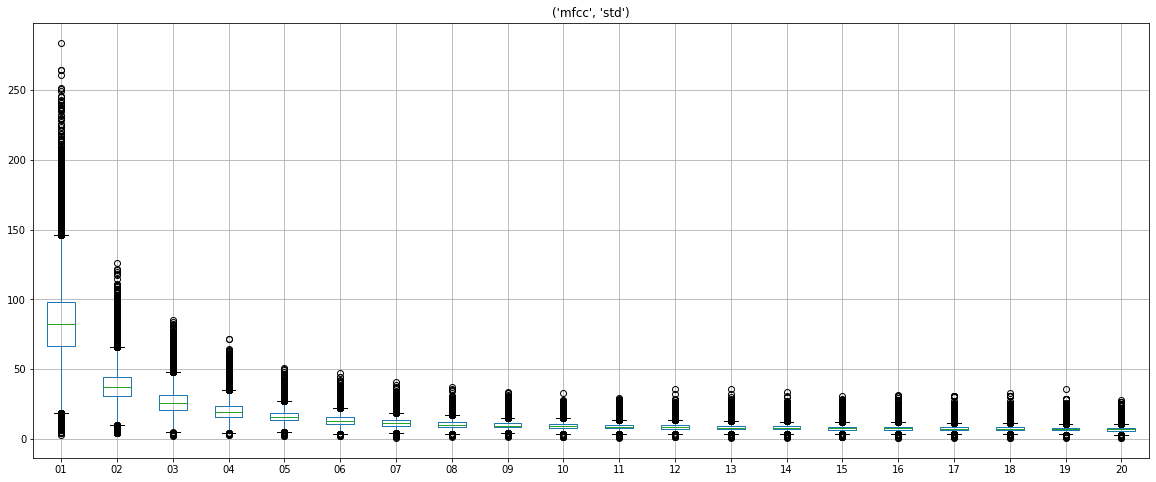

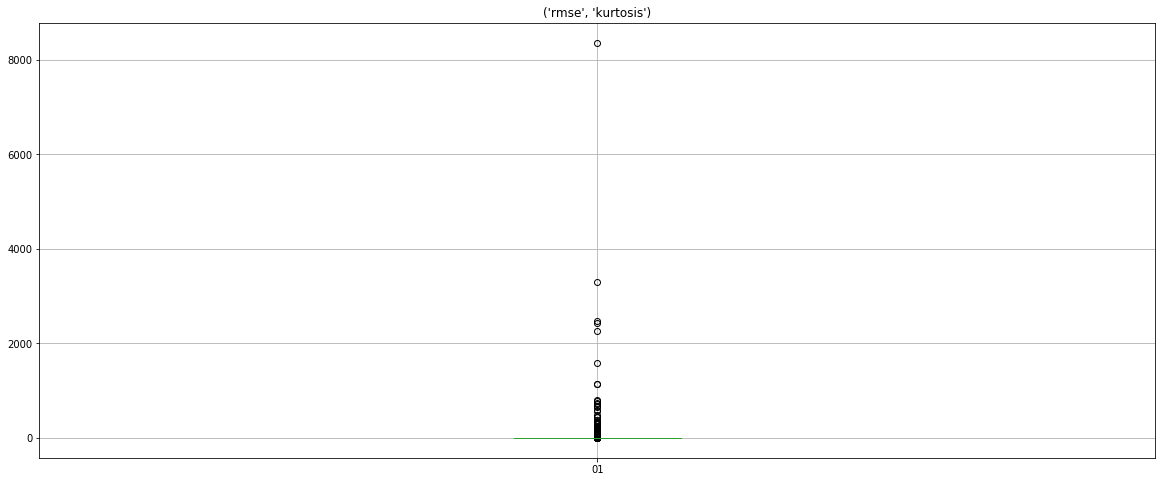

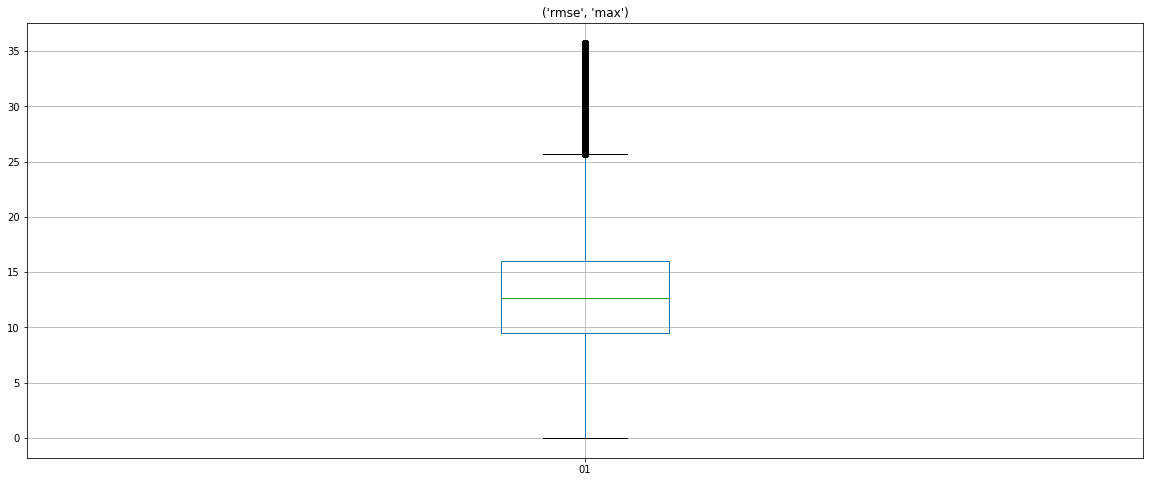

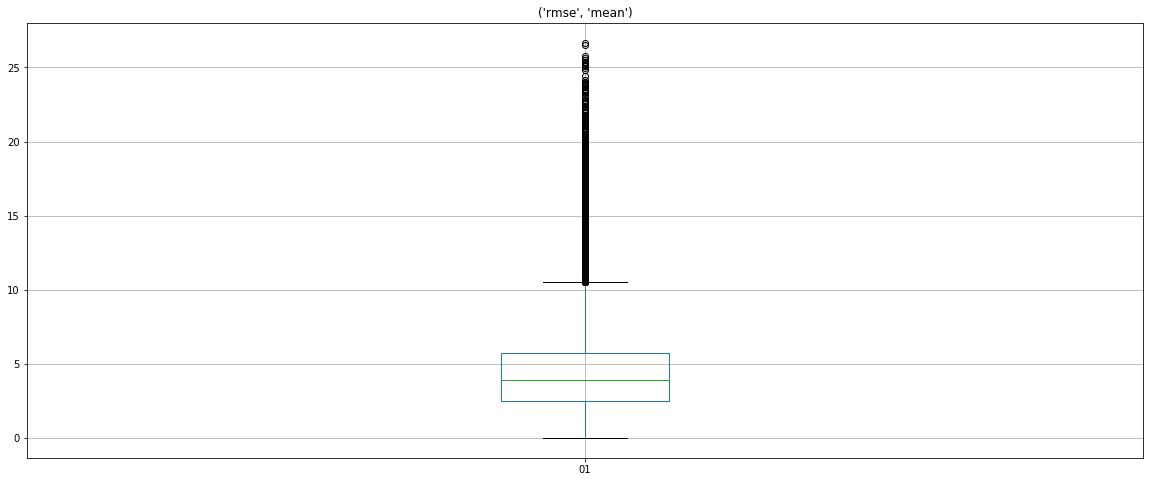

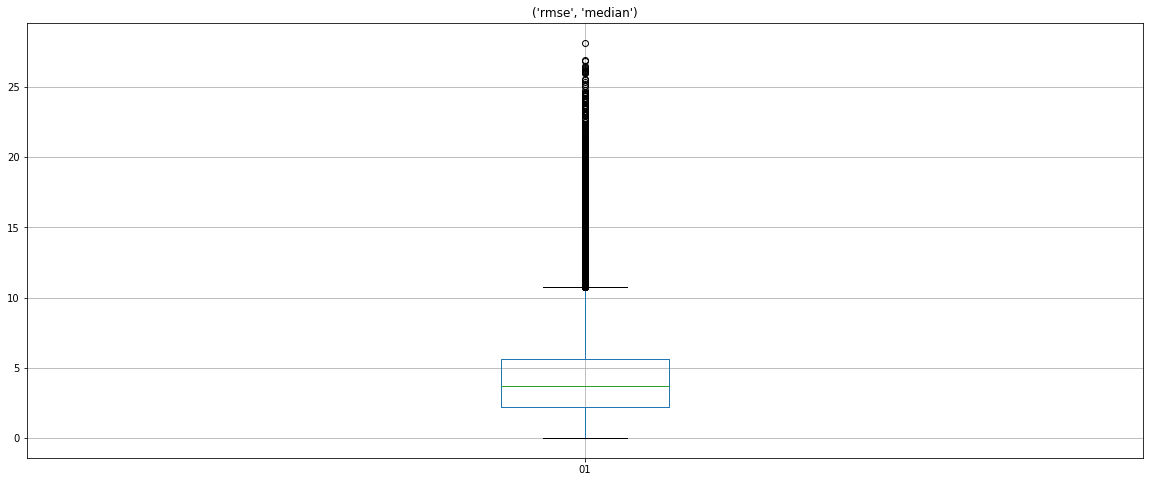

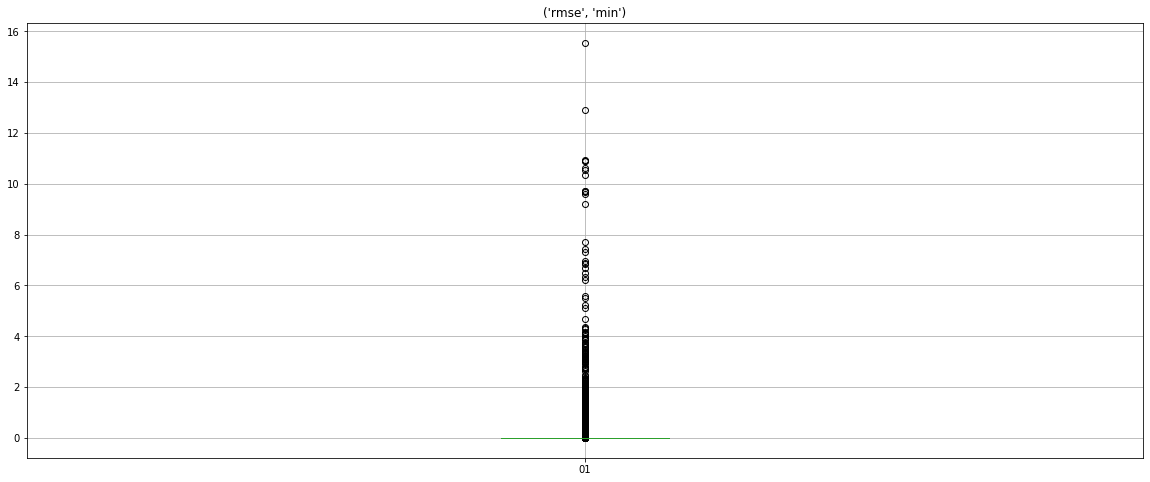

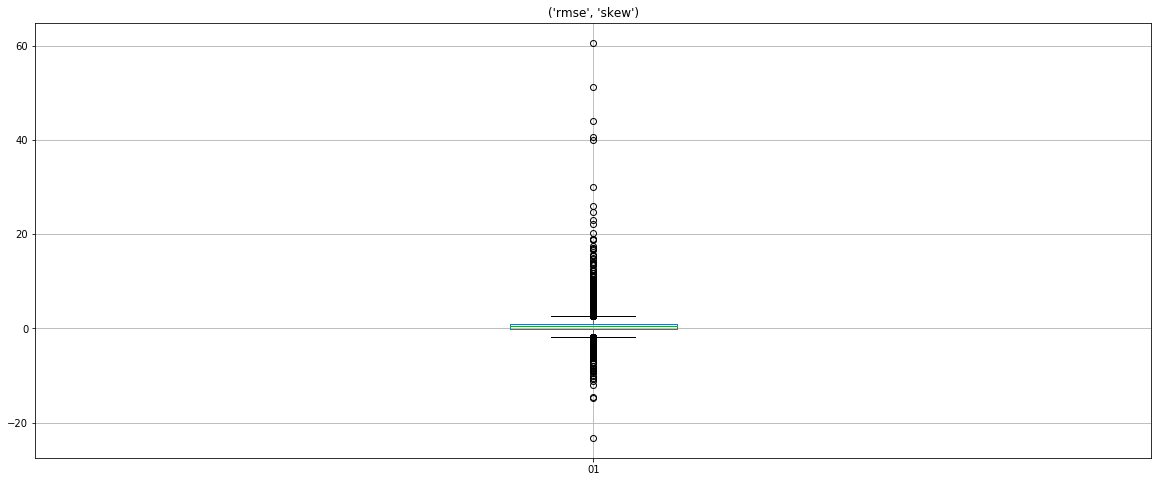

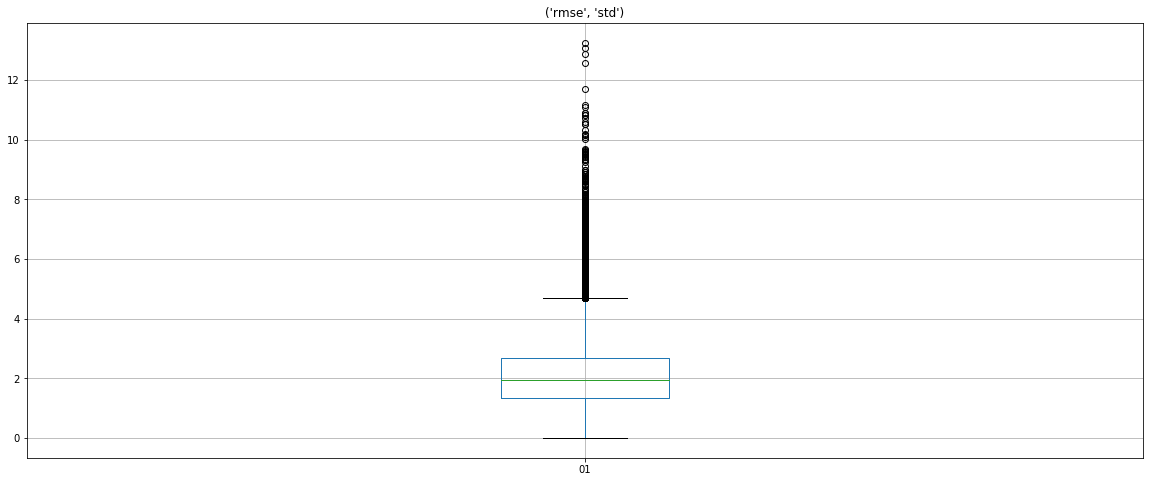

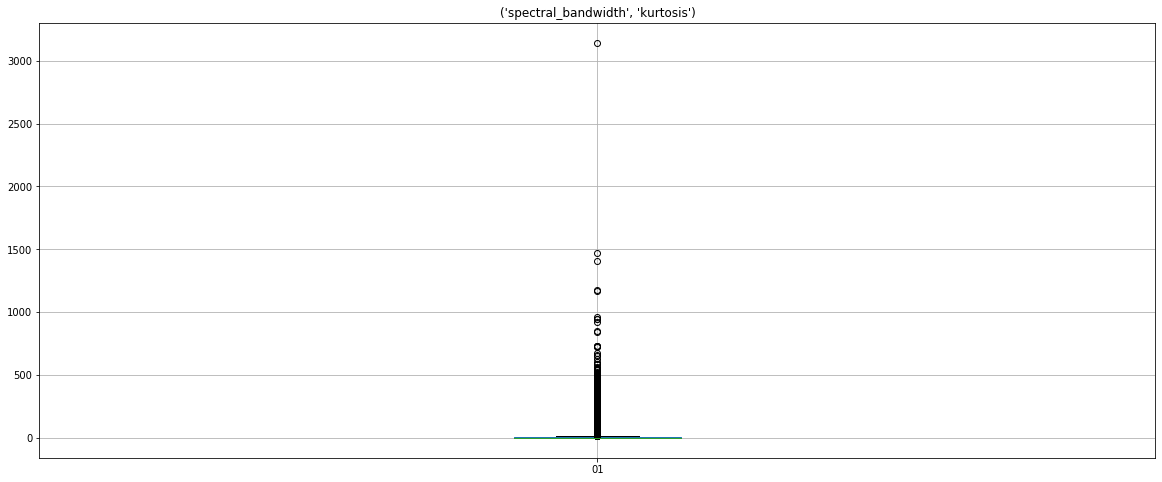

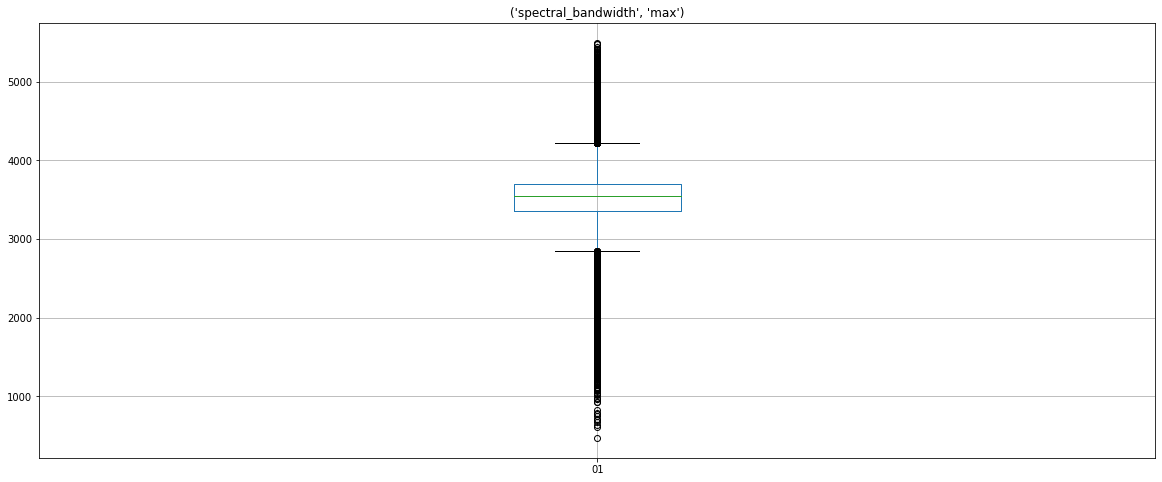

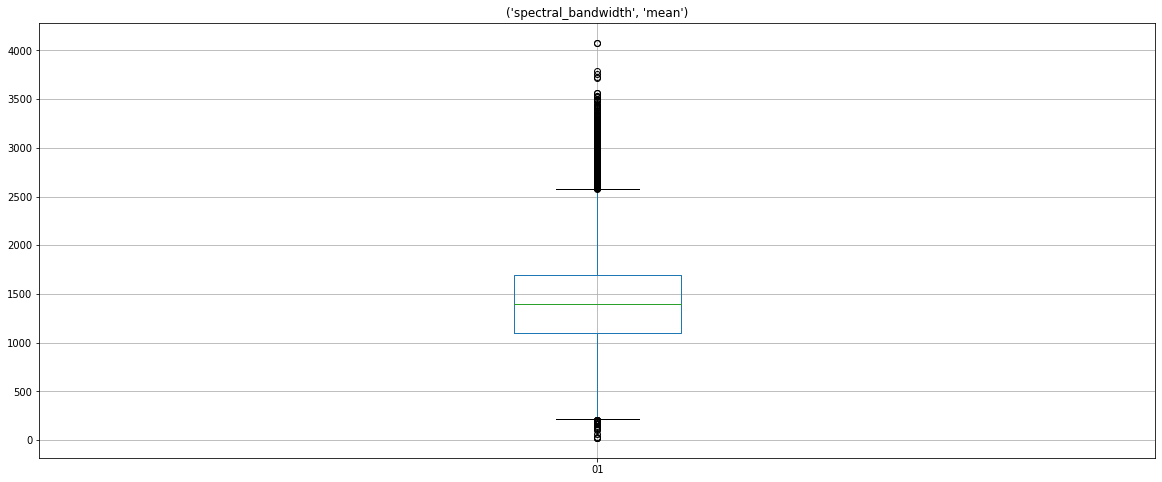

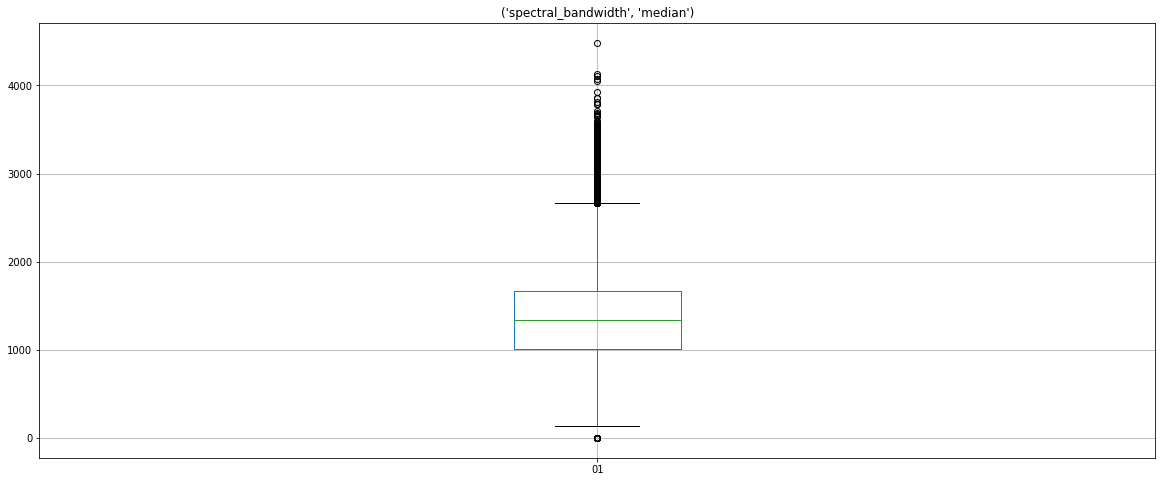

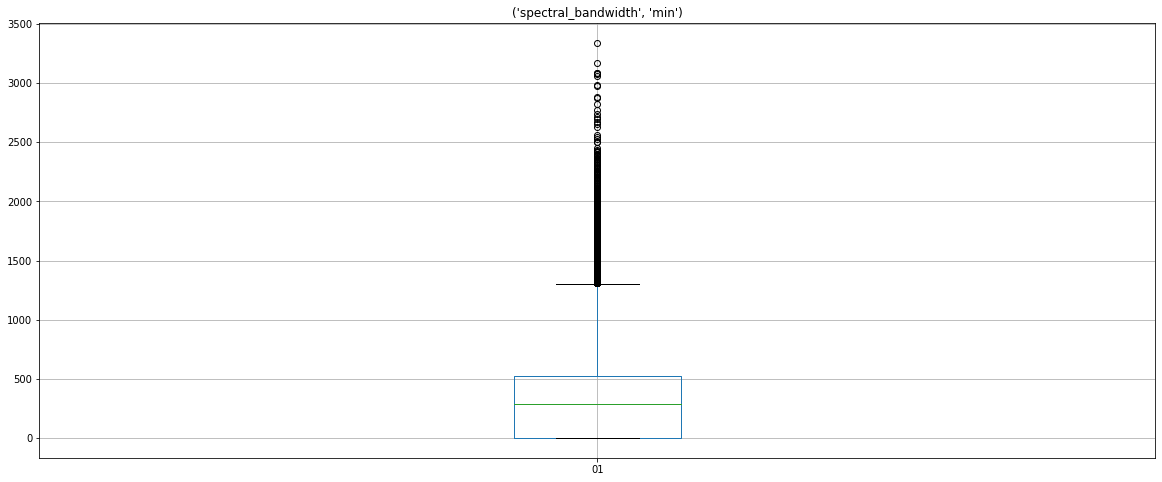

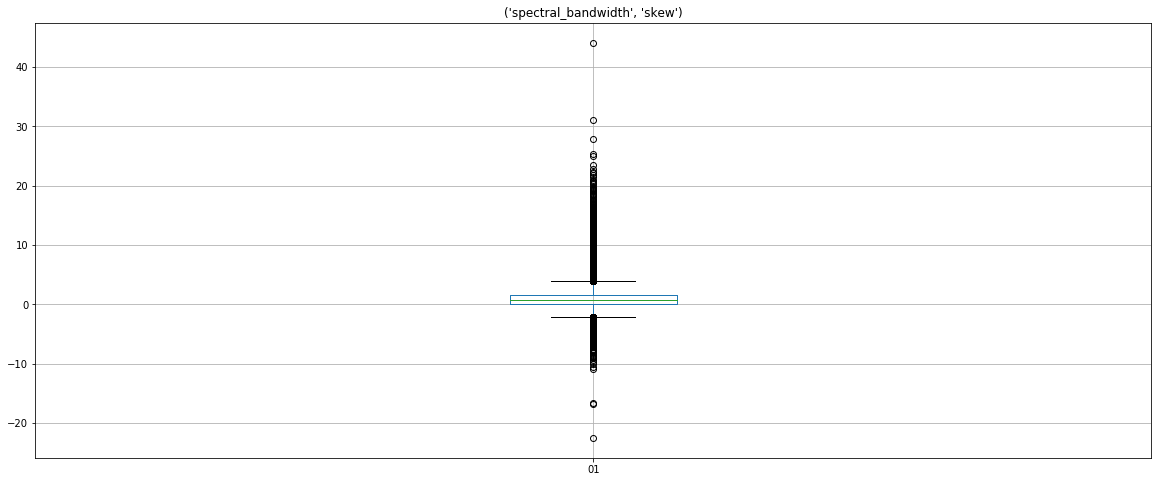

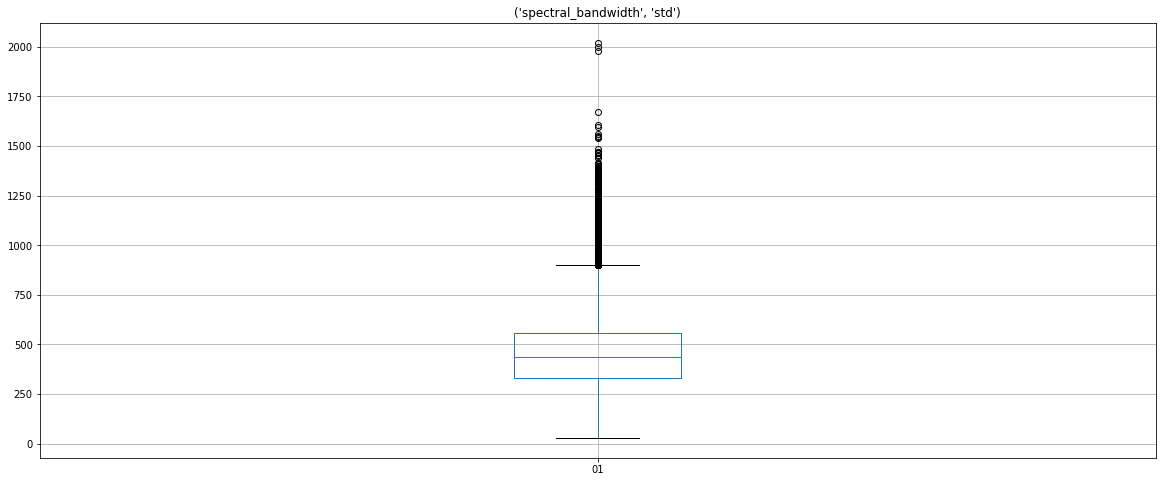

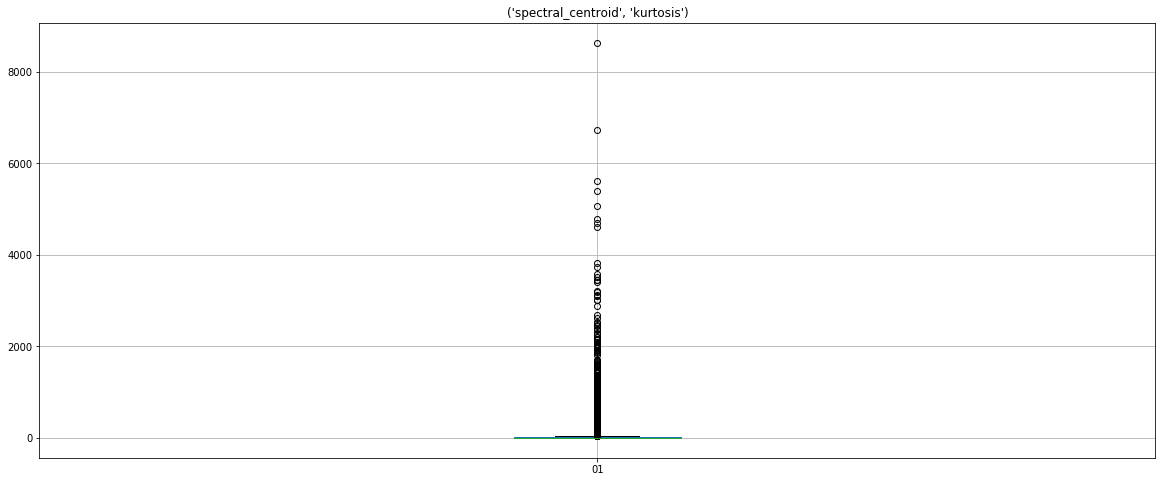

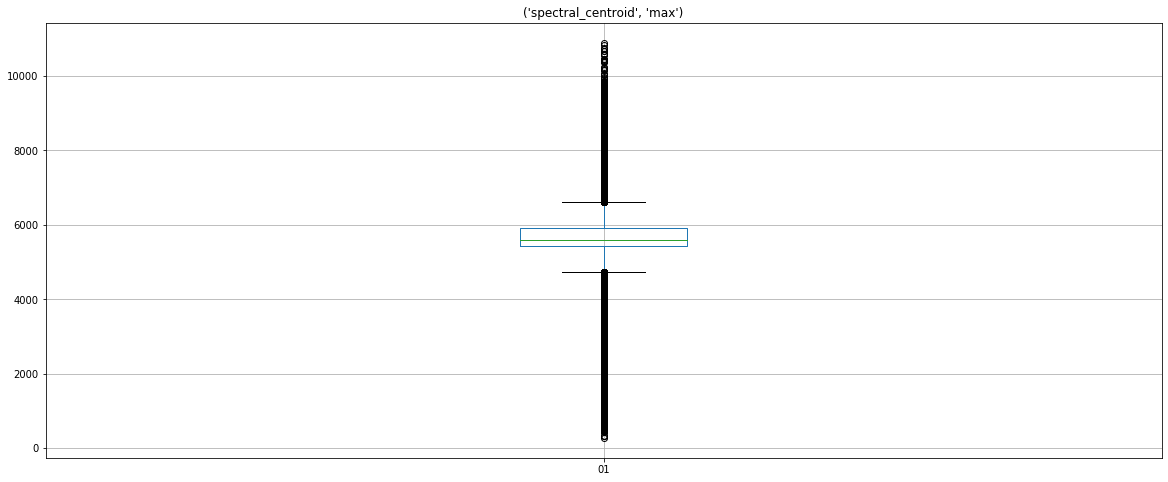

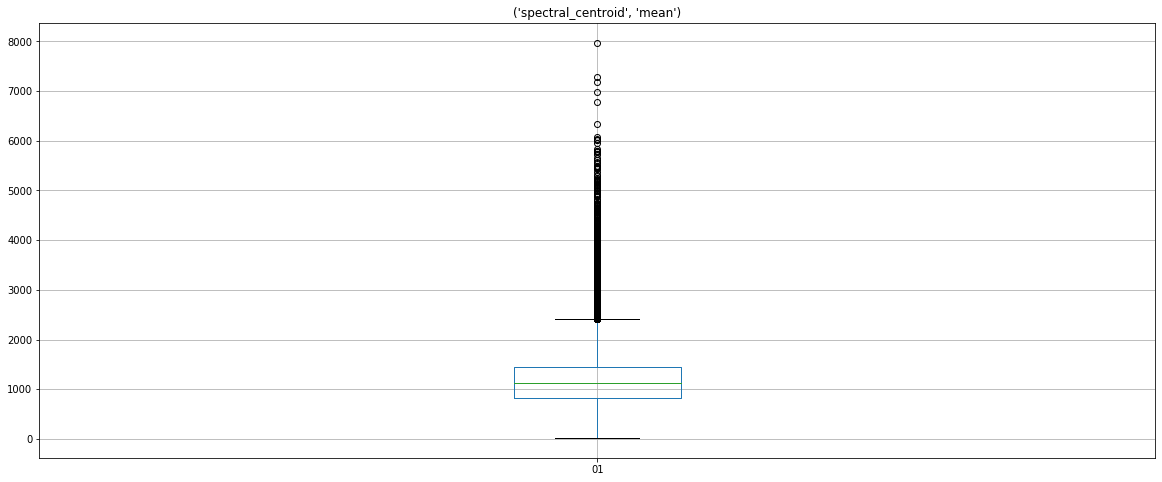

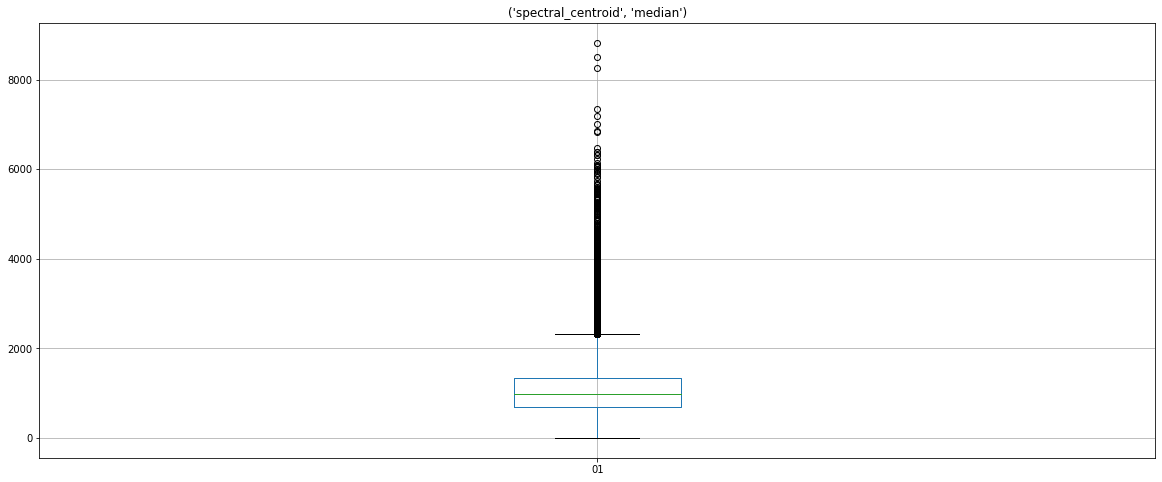

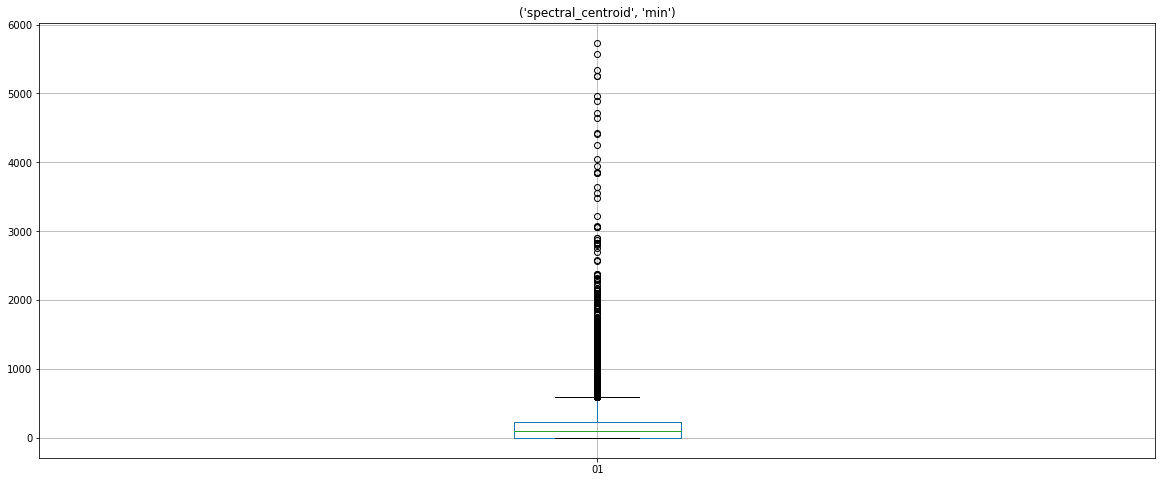

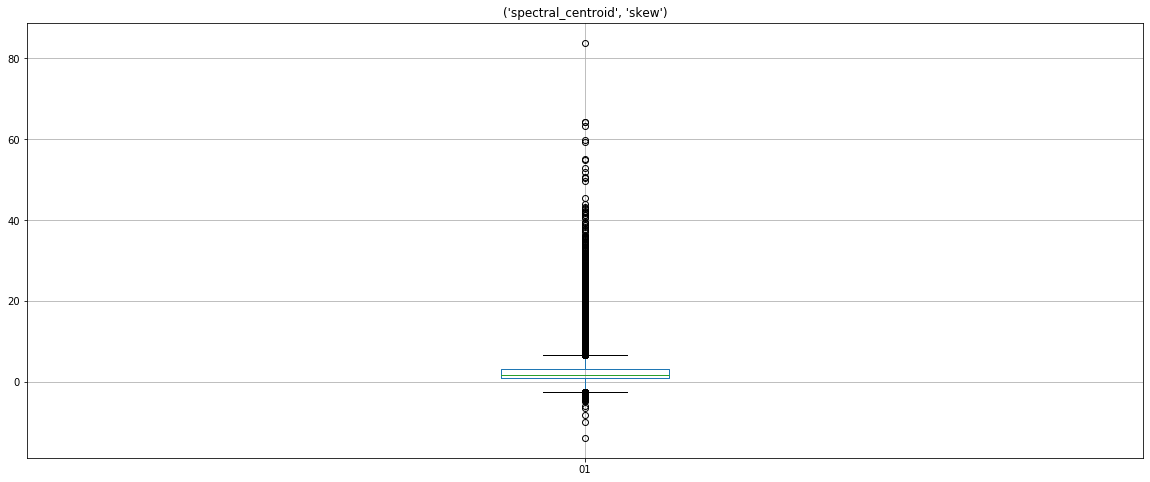

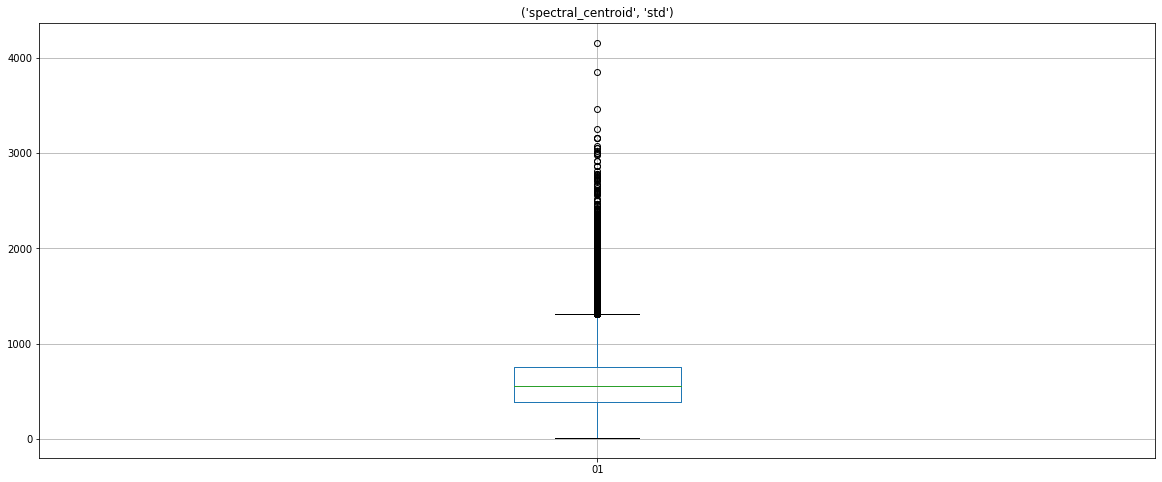

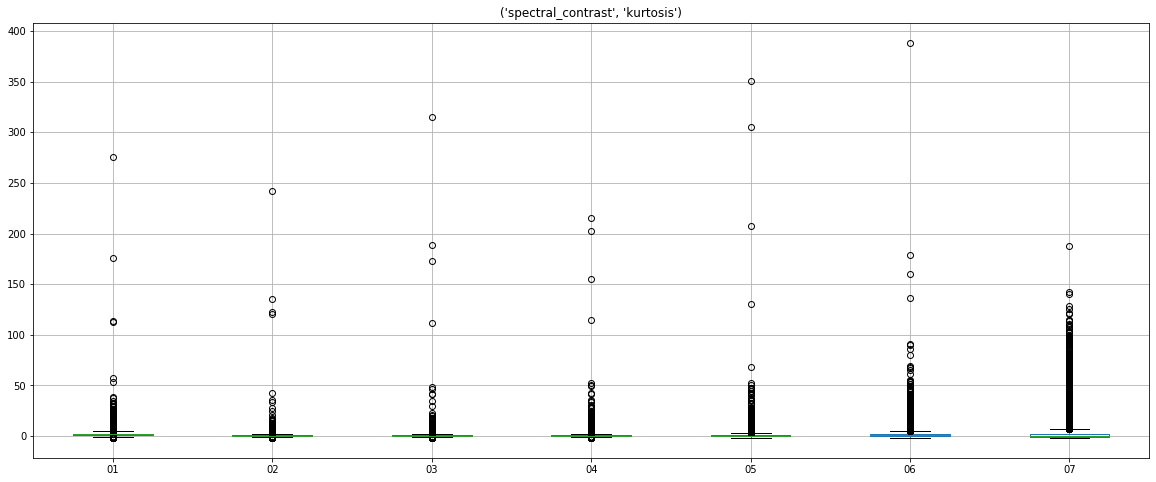

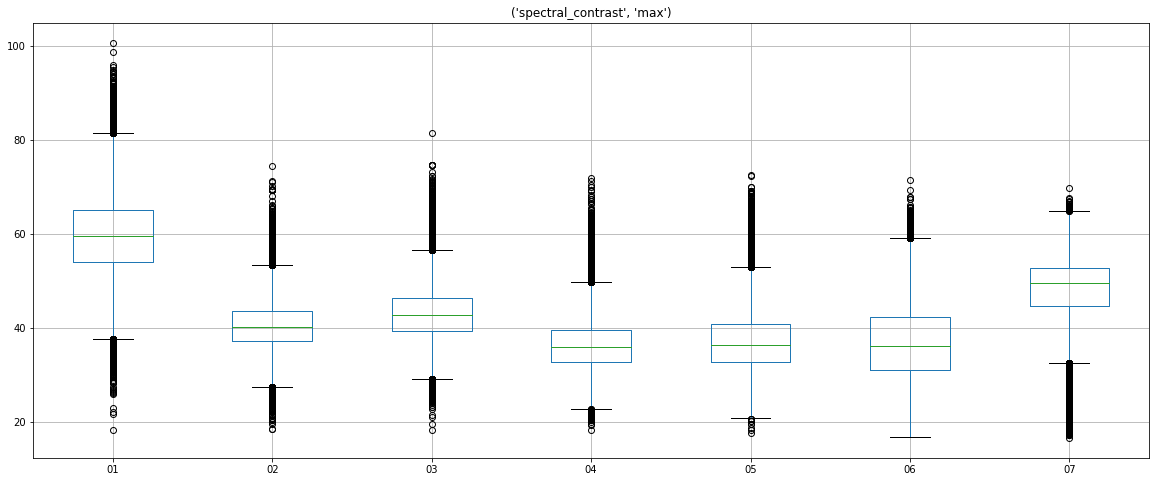

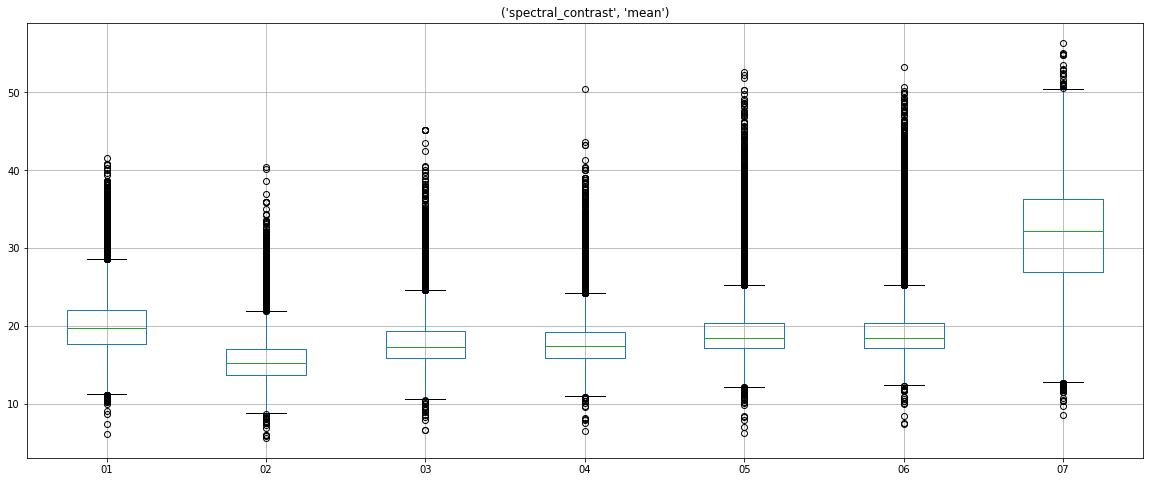

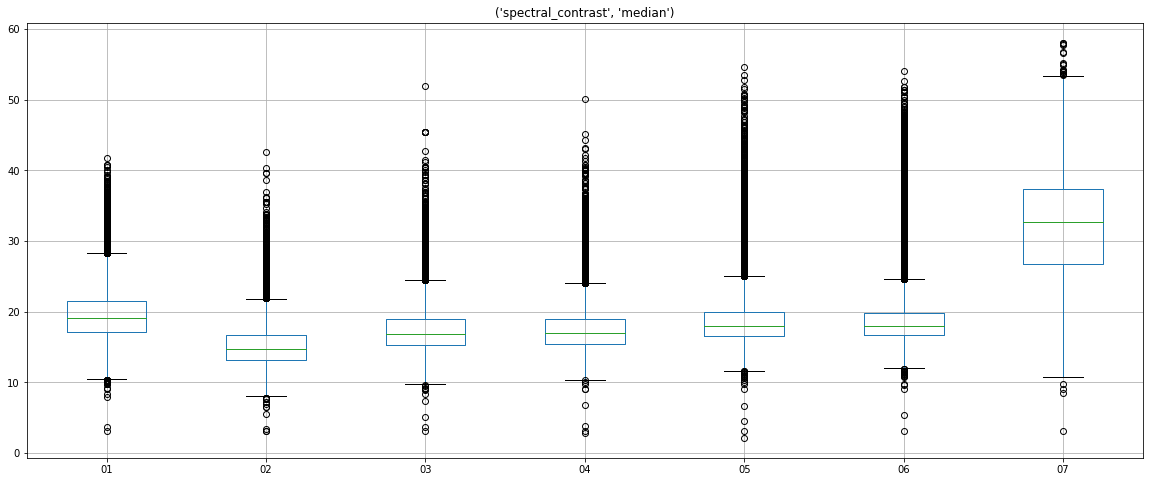

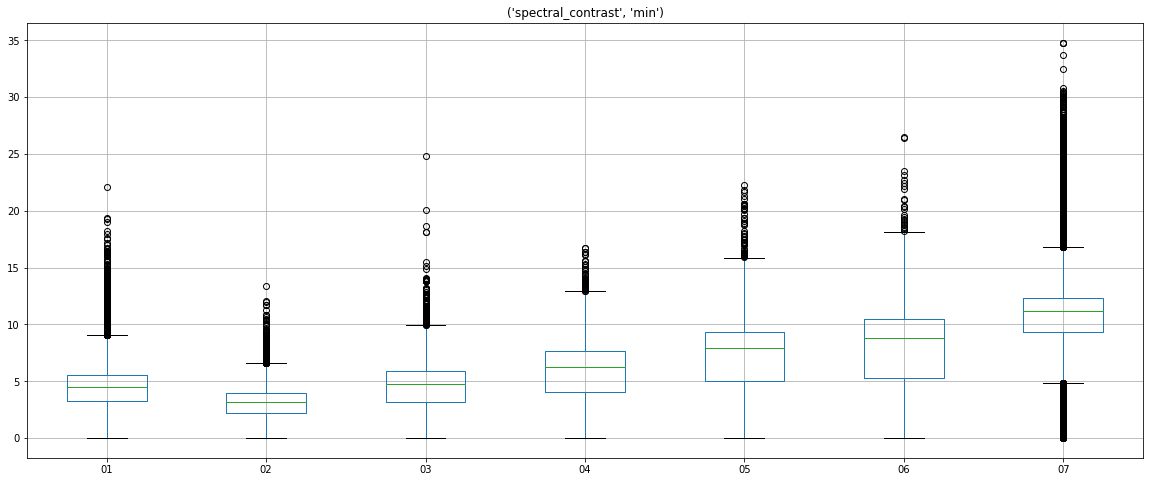

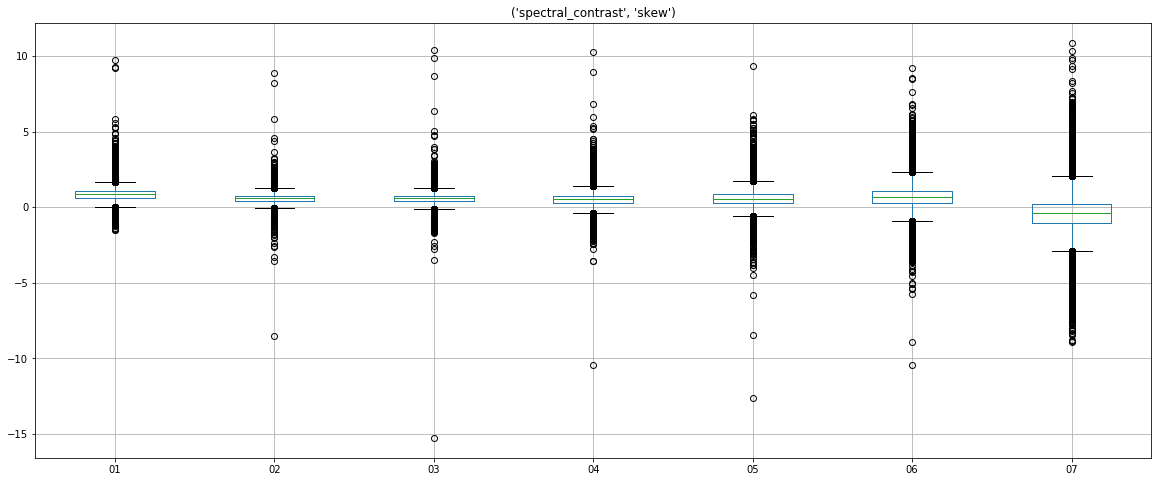

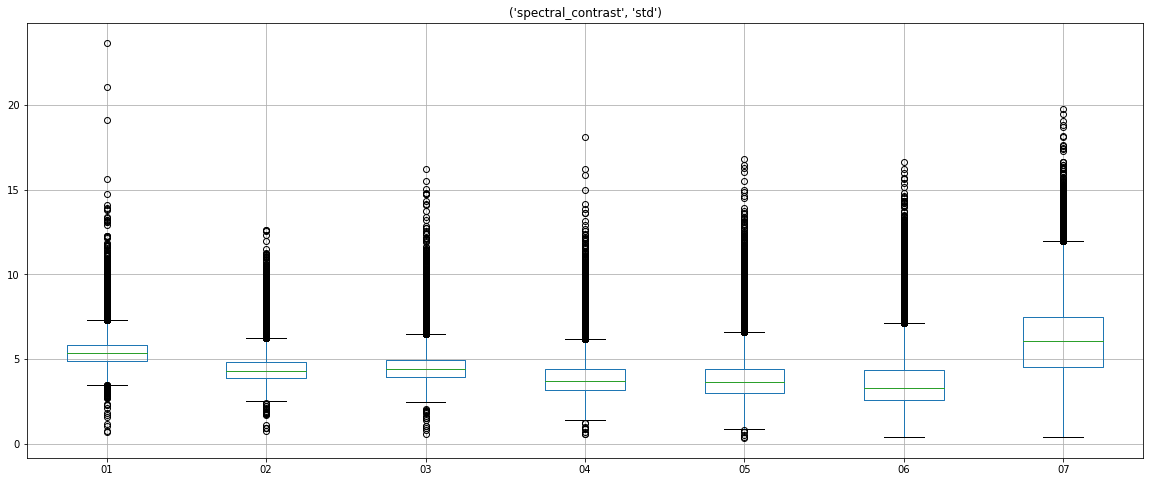

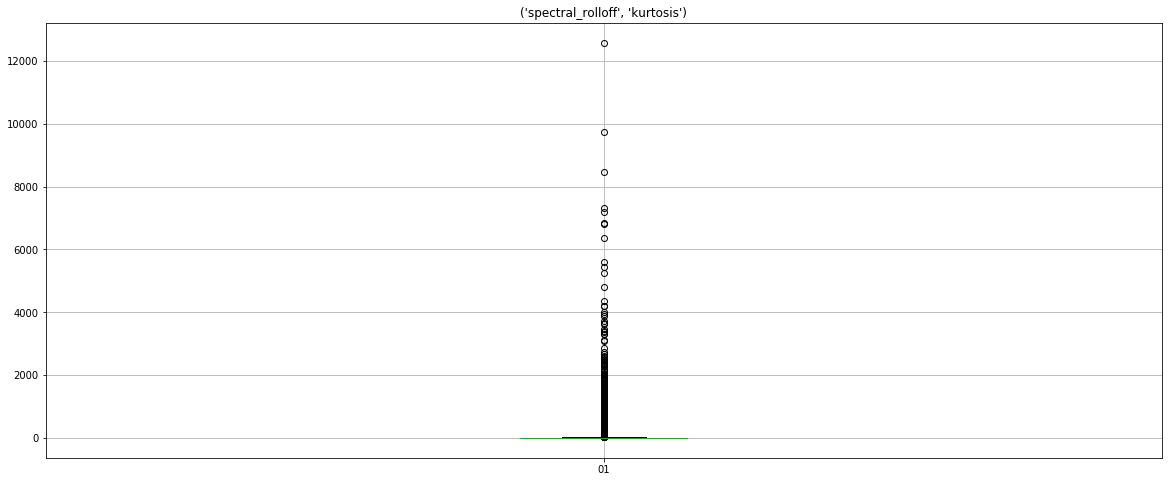

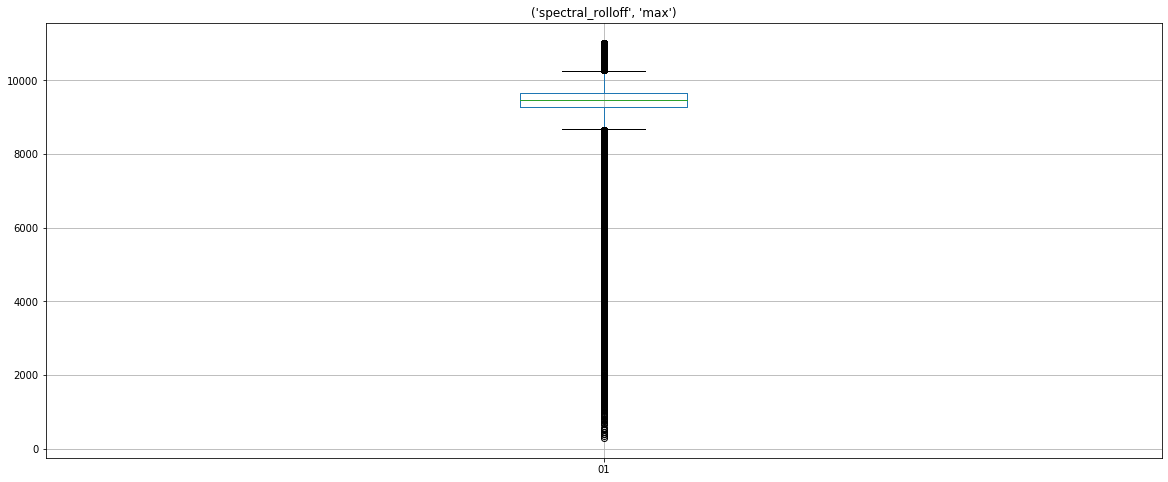

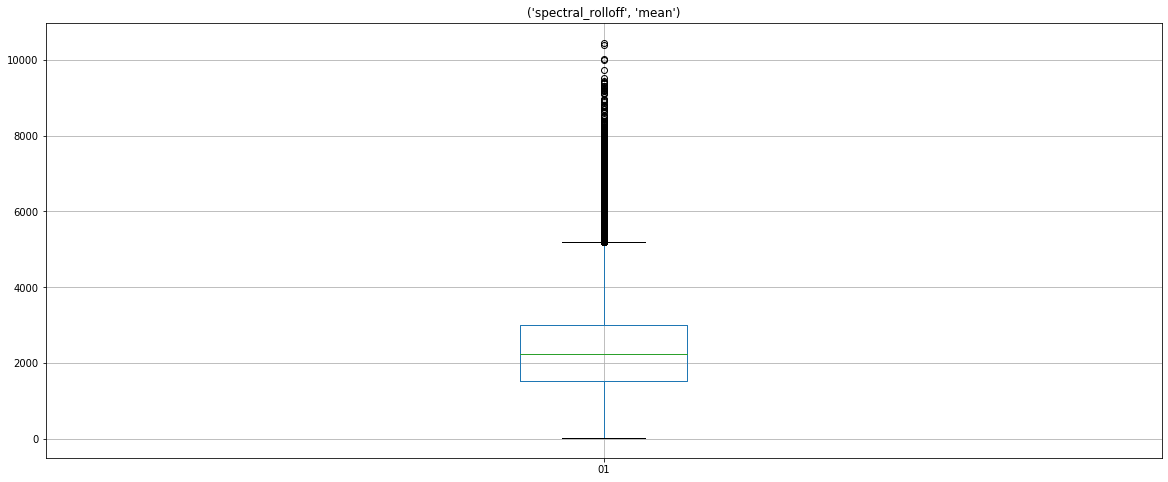

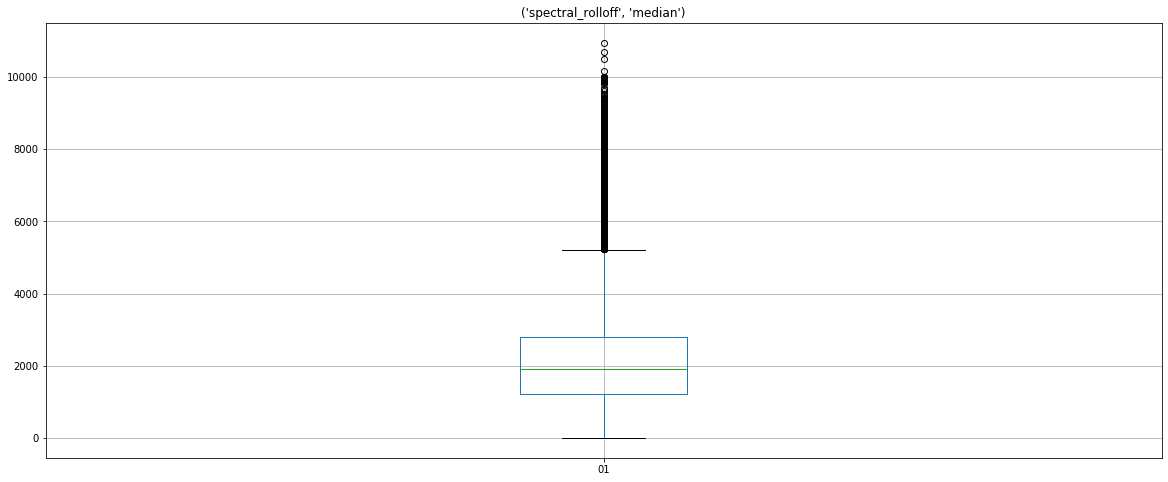

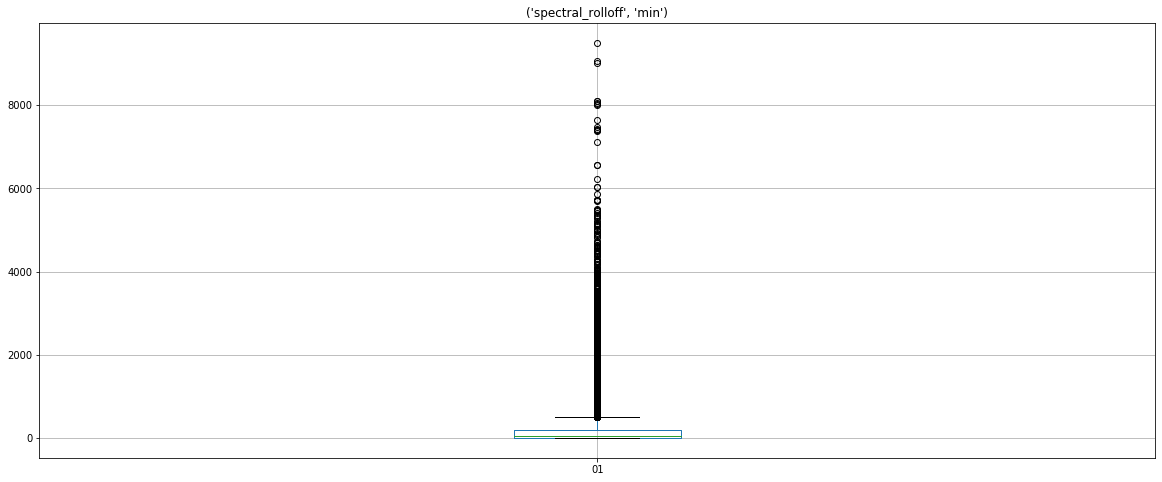

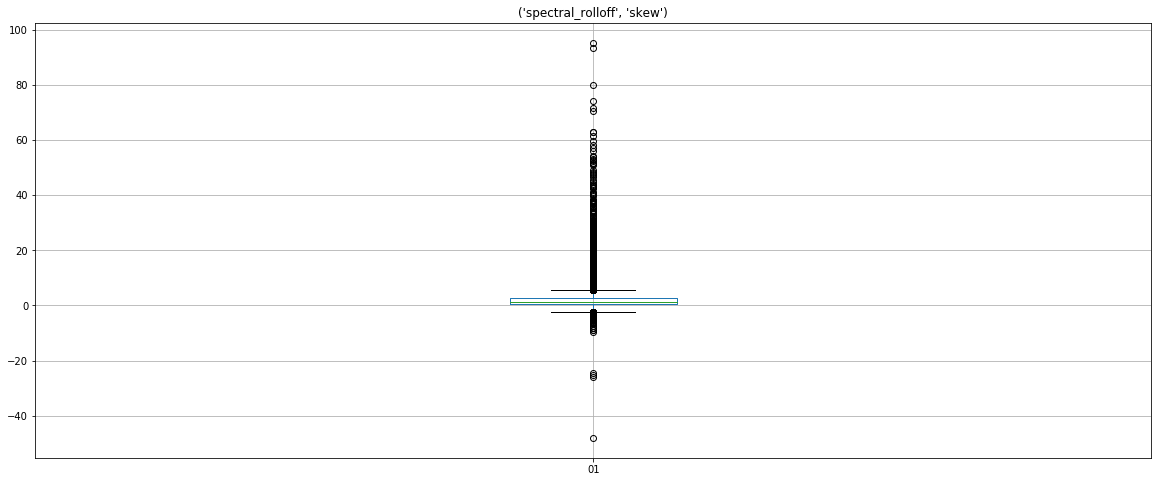

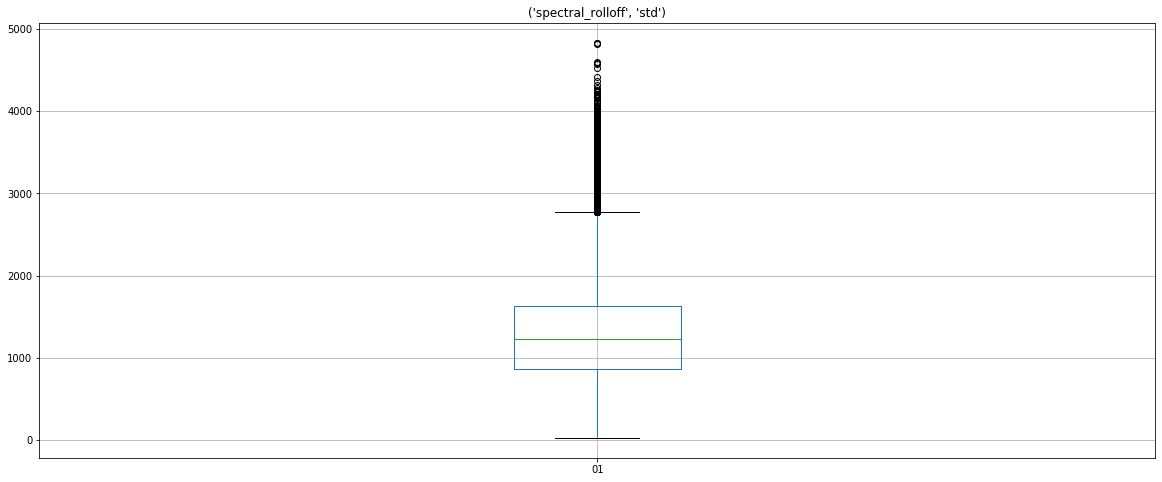

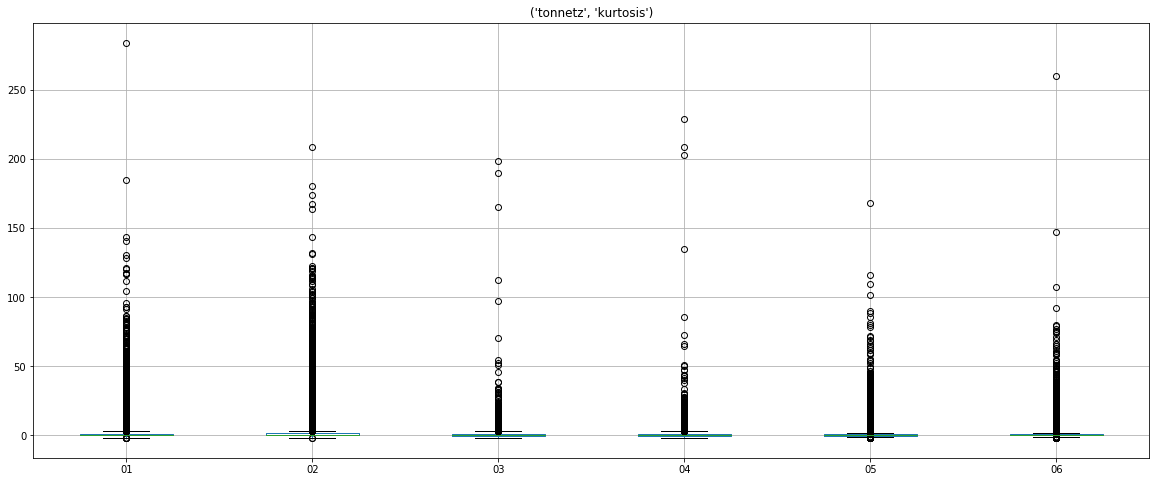

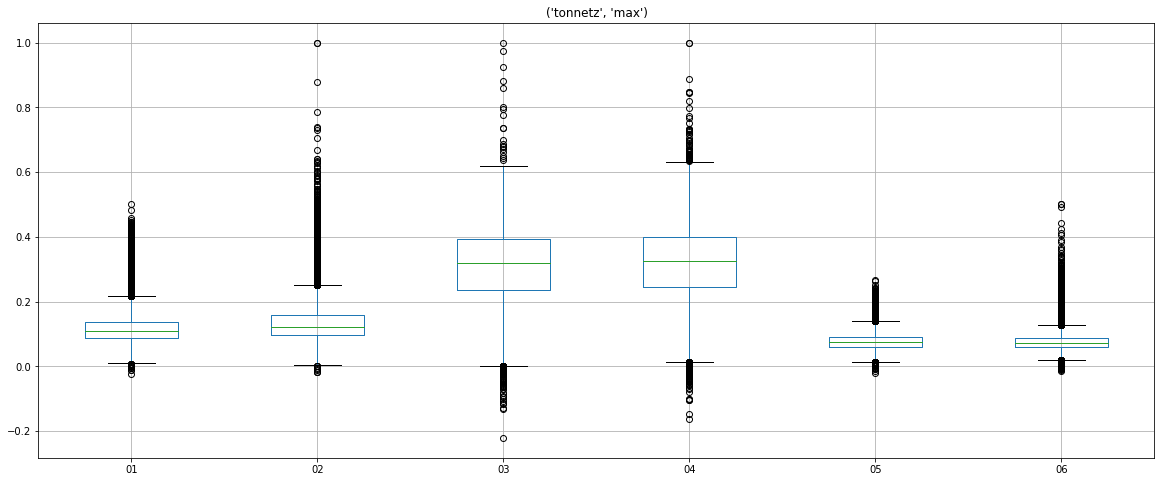

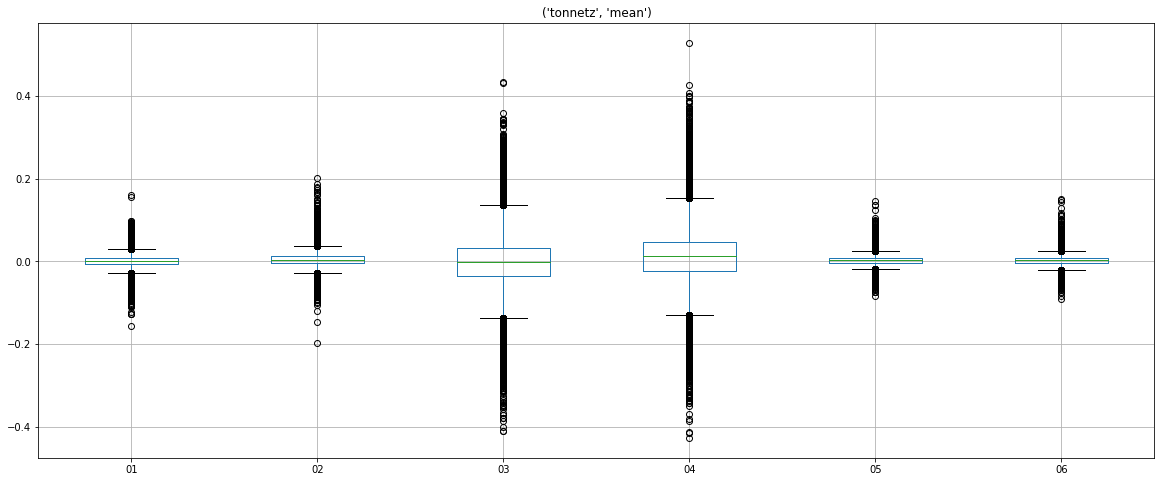

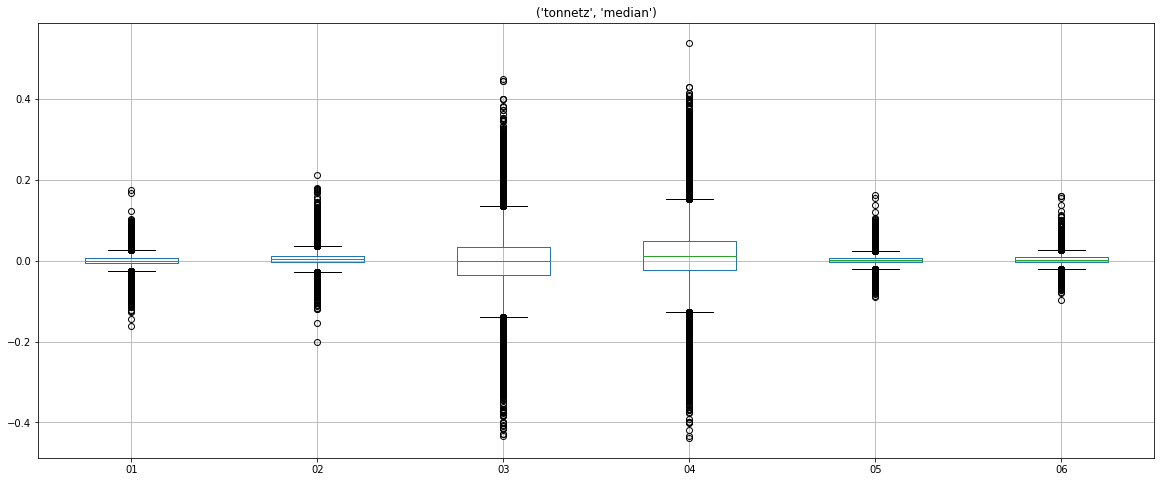

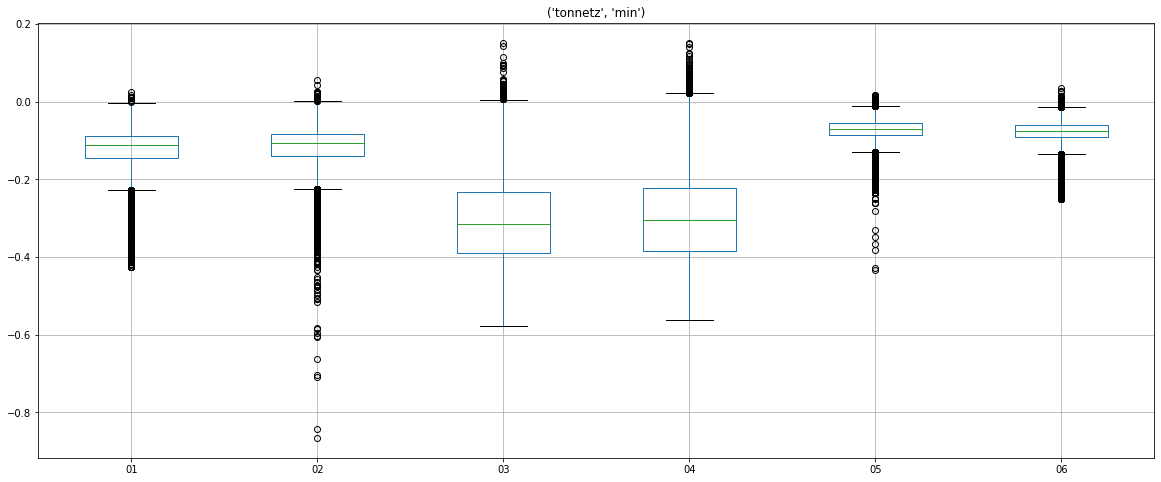

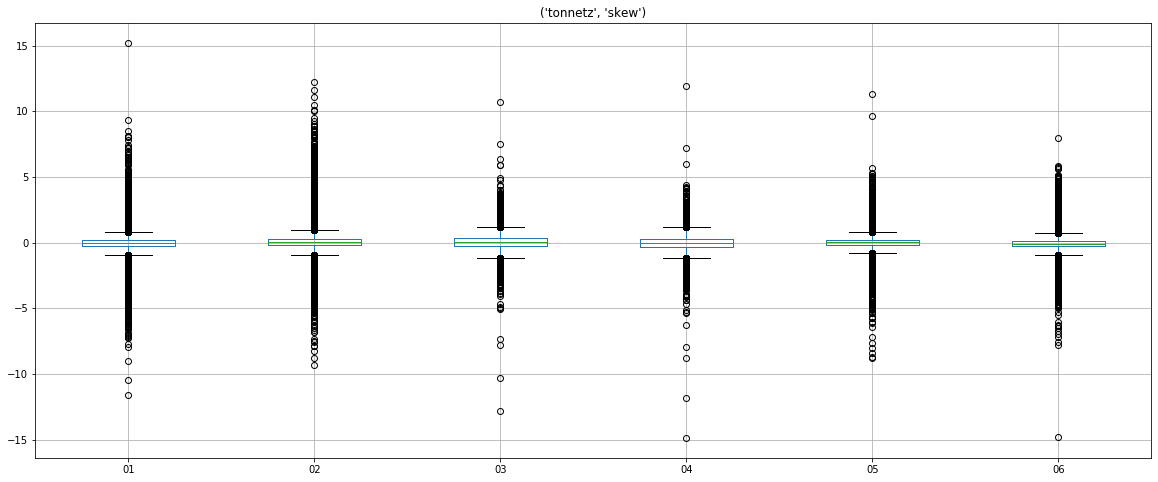

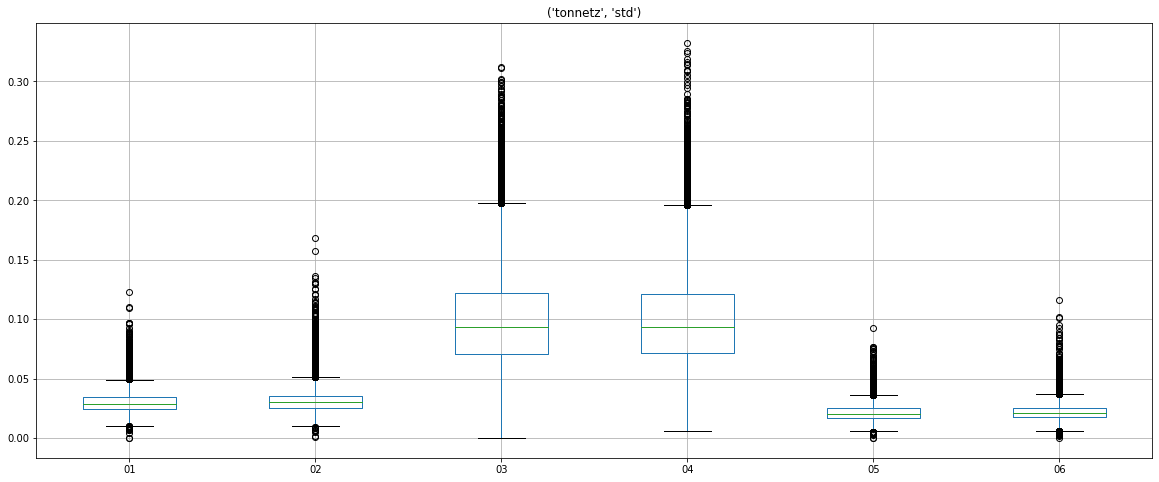

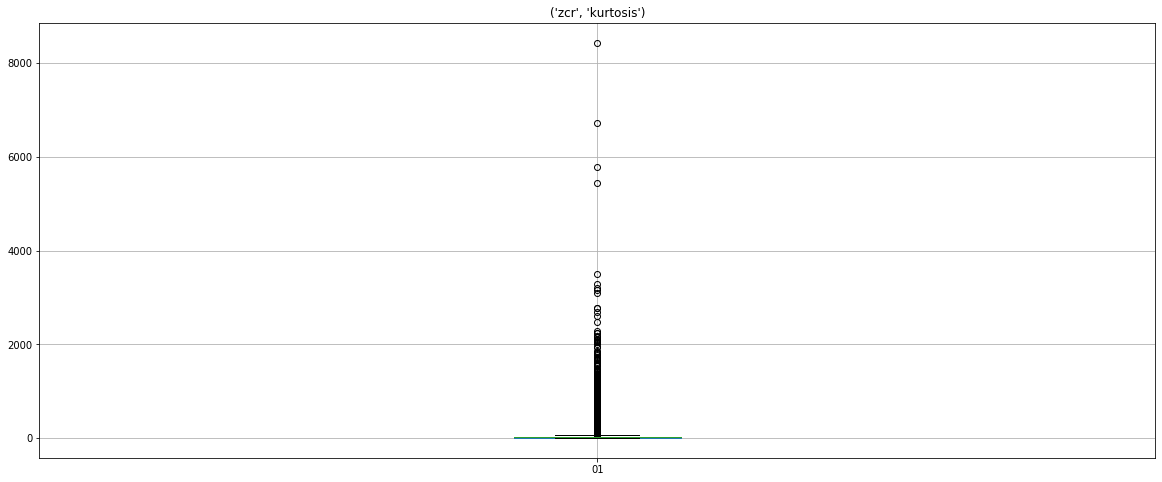

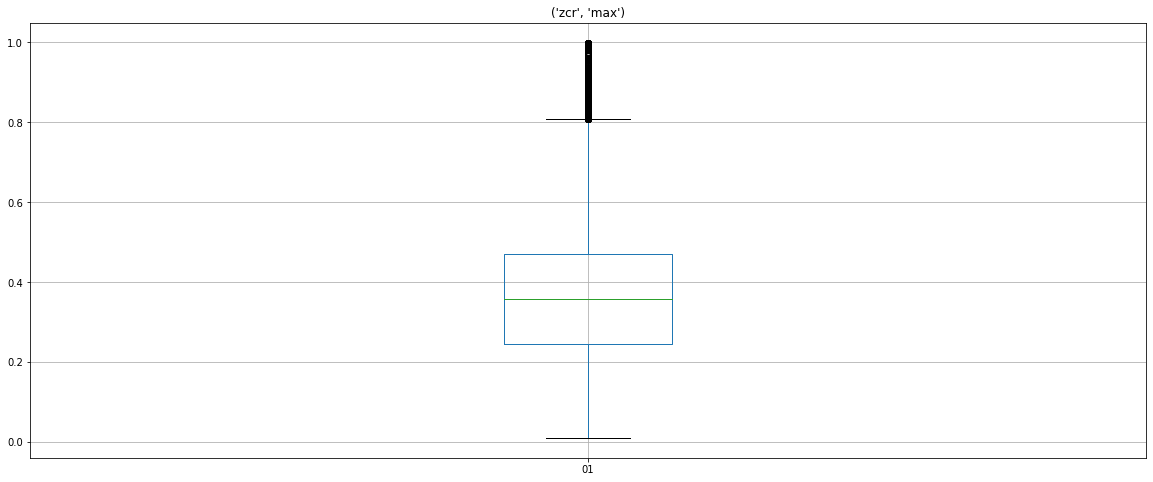

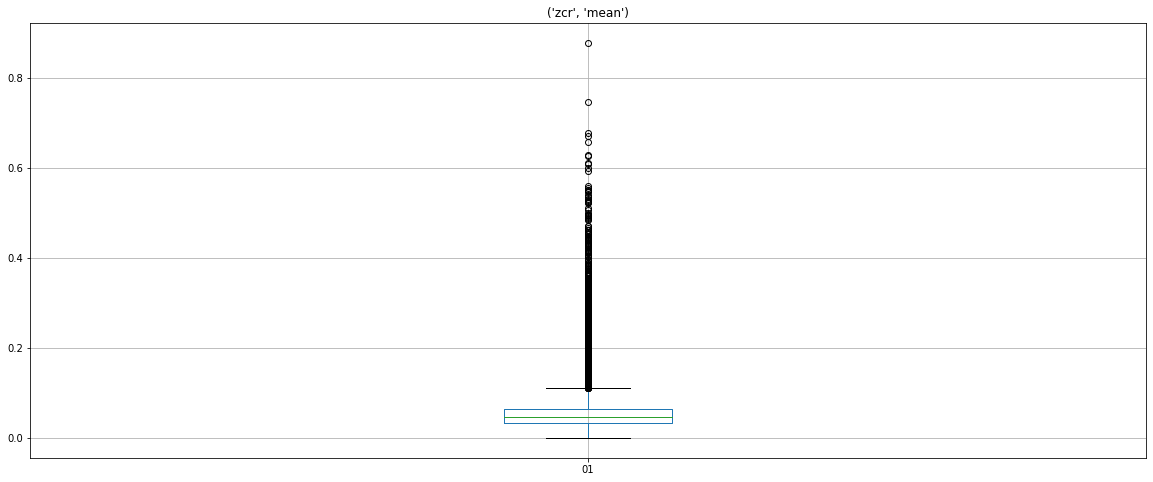

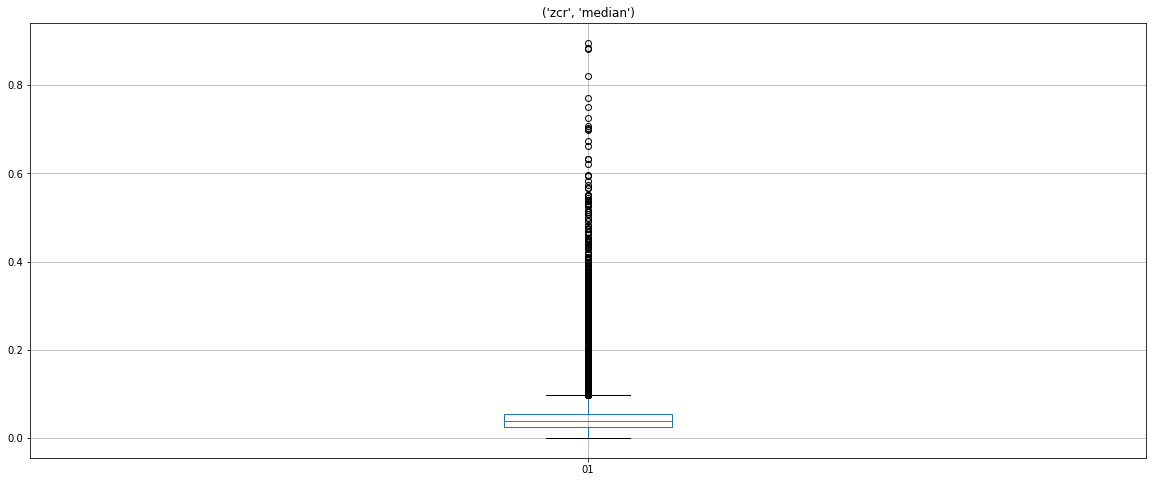

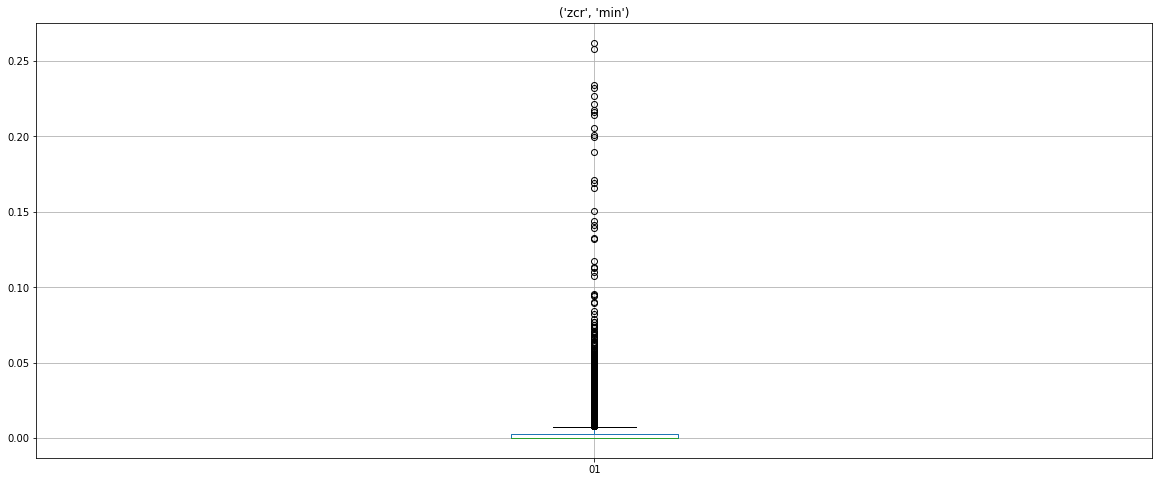

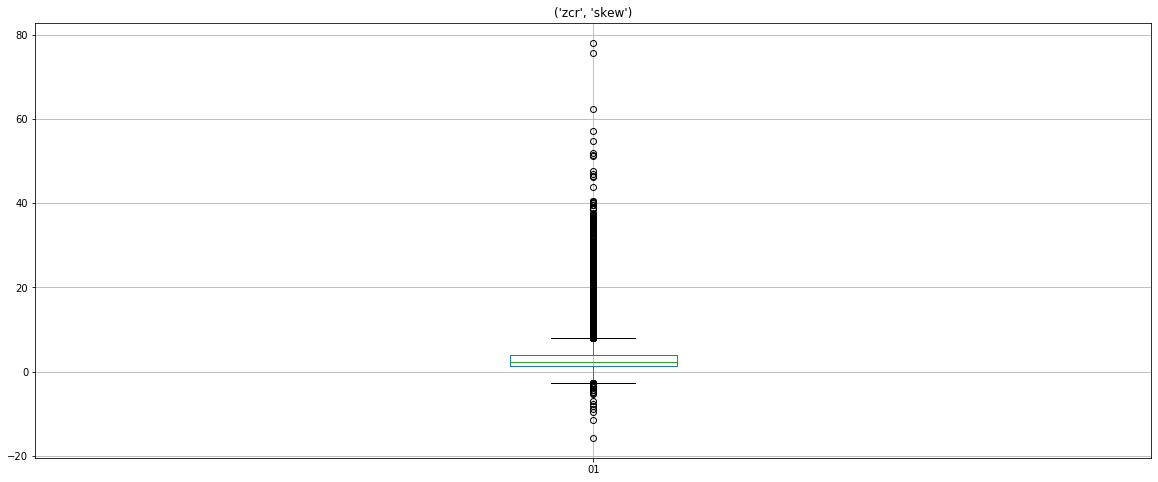

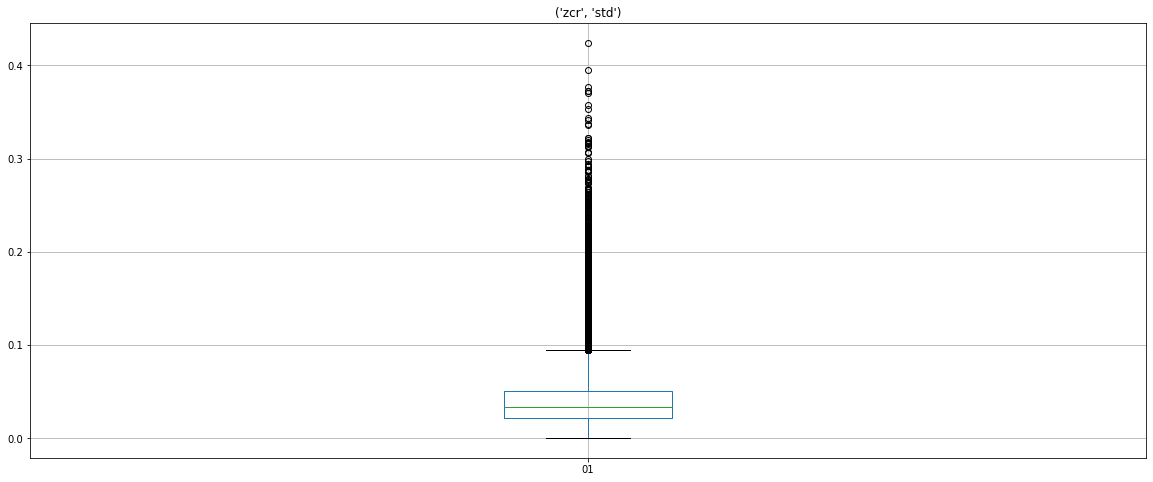

In [0]:
for a in group:
    subset = features[a[0]][a[1]]
    plt.figure(figsize=(20, 8))
    boxplot = subset.boxplot()
    plt.title(a)
    plt.show()

In [0]:
features.corr()

feature                       chroma_cens            ...       zcr          
statistics                       kurtosis            ...      skew       std
number                                 01        02  ...        01        01
feature     statistics number                        ...                    
chroma_cens kurtosis   01        1.000000  0.168040  ...  0.025801 -0.009808
                       02        0.168040  1.000000  ...  0.016010 -0.011634
                       03        0.072936  0.256776  ...  0.019725 -0.016049
                       04        0.114748  0.581978  ...  0.003503 -0.008062
                       05        0.087447  0.563089  ...  0.048093 -0.009609
...                                   ...       ...  ...       ...       ...
zcr         mean       01       -0.001692 -0.001086  ... -0.355198  0.630817
            median     01        0.001103  0.003289  ... -0.353421  0.383143
            min        01        0.006344  0.004314  ... -0.020148 -0.026719
            skew       01        0.025801  0.016010  ...  1.000000 -0.035560
            std        01       -0.009808 -0.011634  ... -0.035560  1.000000

[518 rows x 518 columns]

# **Pre-processing those dataset for later**

In [0]:
index = pd.read_csv("/content/drive/My Drive/projet IA/index.csv")
list_index = index['list_index'].to_list()

type(list_index[0])

int

Maintenant la variable index elle contient que les 8000 index des tracks qui sont dans '*fma_small*'

In [0]:
___test_unique_album = tracks[('album', 'id')]

___test_unique_album.values

array([    1,     1,     1, ..., 22940, 22940, 22906])

In [0]:
artists = pd.read_csv("/content/fma_metadata/raw_artists.csv", index_col=0)
albums = pd.read_csv("/content/fma_metadata/raw_albums.csv", index_col=0)

In [0]:
tracks = tracks[tracks.index.isin(list_index)]

genres.to_csv("/content/drive/My Drive/projet IA/genres.csv")
tracks.to_csv("/content/drive/My Drive/projet IA/tracks.csv")
echonest[echonest.index.isin(list_index)].to_csv("/content/drive/My Drive/projet IA/echonest.csv")
features[features.index.isin(list_index)].to_csv("/content/drive/My Drive/projet IA/features.csv")

unique_album = np.unique(tracks[('album', 'id')].values)
unique_artist = np.unique(tracks[('artist', 'id')].values)

artists[artists.index.isin(unique_artist)].to_csv("/content/drive/My Drive/projet IA/artists.csv")
albums[albums.index.isin(unique_album)].to_csv("/content/drive/My Drive/projet IA/albums.csv")

Travailler sur les genres

In [0]:
converter = genres[["top_level"]].to_dict()["top_level"]
converter

{1: 38,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 38,
 7: 20,
 8: 8,
 9: 9,
 10: 10,
 11: 14,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 38,
 17: 17,
 18: 1235,
 19: 14,
 20: 20,
 21: 21,
 22: 38,
 25: 12,
 26: 12,
 27: 12,
 30: 38,
 31: 12,
 32: 38,
 33: 17,
 36: 12,
 37: 4,
 38: 38,
 41: 38,
 42: 15,
 43: 20,
 45: 12,
 46: 2,
 47: 38,
 49: 17,
 53: 12,
 58: 12,
 63: 9,
 64: 12,
 65: 20,
 66: 12,
 70: 12,
 71: 12,
 74: 4,
 76: 10,
 77: 2,
 79: 2,
 81: 2,
 83: 21,
 85: 12,
 86: 2,
 88: 12,
 89: 12,
 90: 12,
 92: 2,
 94: 17,
 97: 4,
 98: 12,
 100: 21,
 101: 12,
 102: 2,
 103: 17,
 107: 1235,
 109: 12,
 111: 12,
 113: 12,
 117: 2,
 118: 2,
 125: 38,
 130: 2,
 137: 9,
 138: 20,
 166: 20,
 167: 12,
 169: 9,
 170: 13,
 171: 2,
 172: 2,
 173: 2,
 174: 2,
 175: 2,
 176: 2,
 177: 2,
 178: 4,
 179: 4,
 180: 17,
 181: 15,
 182: 15,
 183: 15,
 184: 15,
 185: 15,
 186: 38,
 187: 5,
 188: 20,
 189: 20,
 214: 2,
 224: 38,
 232: 2,
 236: 15,
 240: 15,
 247: 38,
 250: 38,
 267: 1235,
 286: 15,
 296: 15,
 297: 15,

# IMPORTANT

In [0]:
#new_genres = set(str(converter[int(c)]) for c in genres)
#new

def clean_classes(x):
    if "," in x:
        genres = x.split(",")
        new_genres = set(str(converter[int(c)]) for c in genres)
        return int(new_genres.pop())
    else:
        return converter[int(x)]

converter = genres[["top_level"]].to_dict()["top_level"]
y = tracks[('track', 'genres')].str.replace("[^0-9,]", "")
y = y.apply(clean_classes).to_frame()
y.columns = ['genres']
y = y.join(genres["title"], on = ["genres"])
y

,genres,title
track_id,,
2,21,Hip-Hop
5,21,Hip-Hop
10,10,Pop
140,17,Folk
141,17,Folk
...,...,...
154308,21,Hip-Hop
154309,21,Hip-Hop
154413,10,Pop


In [0]:
np.unique(y['title'].values)

array(['Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental',
       'International', 'Pop', 'Rock'], dtype=object)

*title par nb of occurence*

In [0]:
y["title"].value_counts()

Pop              1000
Hip-Hop          1000
Folk             1000
Experimental     1000
Electronic       1000
Instrumental     1000
International    1000
Rock             1000
Name: title, dtype: int64

**Commentaire :**  the dataset description our dataset is balanced with 1000 song on 8 classes.


# save file classes.csv that contain track_id with his genre

In [0]:
y.to_csv("/content/drive/My Drive/projet IA/classes.csv")

In [0]:
__tracks = pd.read_csv("tracks.csv", header = [0, 1], index_col= 0, skipinitialspace=True,)
__tracks

album  ...                                      track
         comments  ...                                      title
track_id           ...                                           
2               0  ...                                       Food
3               0  ...                               Electric Ave
5               0  ...                                 This World
10              0  ...                                    Freeway
20              0  ...                            Spiritual Level
...           ...  ...                                        ...
155316          0  ...                                  The Auger
155317          0  ...                            Let's Skin Ruby
155318          0  ...         My House Smells Like Kim Deal/Pulp
155319          0  ...                    The Man With Two Mouths
155320          0  ...  Another Trick Up My Sleeve (Instrumental)

[106574 rows x 52 columns]

In [0]:
__tracks.columns

MultiIndex([( 'album',          'comments'),
            ( 'album',      'date_created'),
            ( 'album',     'date_released'),
            ( 'album',          'engineer'),
            ( 'album',         'favorites'),
            ( 'album',                'id'),
            ( 'album',       'information'),
            ( 'album',           'listens'),
            ( 'album',          'producer'),
            ( 'album',              'tags'),
            ( 'album',             'title'),
            ( 'album',            'tracks'),
            ( 'album',              'type'),
            ('artist', 'active_year_begin'),
            ('artist',   'active_year_end'),
            ('artist', 'associated_labels'),
            ('artist',               'bio'),
            ('artist',          'comments'),
            ('artist',      'date_created'),
            ('artist',         'favorites'),
            ('artist',                'id'),
            ('artist',          'latitude'),
          

In [0]:
#__tracks[(__tracks[('track', 'genres')].values == np.nan)].count()

# = __tracks[('track', 'genres')].values
#t.index(str("[]"))
#t = np.str.find(t, '[]', start = 0)

y.to_csv("/content/drive/My Drive/projet IA/TracksResum.csv",sep =';')

